In [1]:
import numpy as np
import os

#Loading Data

data = np.loadtxt('IRIS_Flare_Observation_List:', usecols=(0,1,2), skiprows=11, dtype='str', delimiter=' ', encoding = 'utf-8')

realdate = data[:, 0]
realtime = data[:, 1]
realmag = data[:,2]

times = []
time = []
mag = []
for i in range(len(realtime)):
    try:
        time.append(realtime[i][0:2] + realtime[i][3:5])
        times.append(realdate[i])
        mag.append(realmag[i][0:4])
    except ValueError:
        continue

print(times[0])
print(time[0])
print(mag[4][0])
print(len(mag), len(times), len(time))

20131011
1454
C
1029 1029 1029


In [2]:
#Finding Files and filtering for single-slit

import irisreader as ir
from irisreader import observation
ir.config.verbosity_level=0

def list_files_in_directory(directory_path):
    try:
        # Get the list of files and directories in the specified directory
        entries = os.listdir(directory_path)
        file_names = []
        for i in range(len(entries)):
            file_names.append(entries[i])
        # Filter out only files (not directories)
        return file_names
    except FileNotFoundError:
        return f"Error: The directory '{directory_path}' does not exist."
    except PermissionError:
        return f"Error: Permission denied to access '{directory_path}'."
    except Exception as e:
        return f"An unexpected error occurred: {e}"


#times = ['20150314']
path = []
mag1 = []
i = 0
for n in range(len(times)):
    try: 
        path0 = "/sml/iris/" + str(times[n][0:4] + "/" + str(times[n][4:6]) + "/" + str(times[n][6:8]))
        os.chdir( path0)
        directory_path = path0  
        #print('directory')
        #print(str(times[n][0:4]) + str(times[n][4:6]) + str(times[n][6:8]) +'_'+str(time[n]))
        files_in = list_files_in_directory(directory_path)
        files = sorted(files_in, key=lambda f: int(f[9:13]))
        found = False
        for j in range(len(files)-1):
            if files[j][0:8] == times[n] and files[j][9:13] <= str(time[n][0:4]) and files[j+1][9:13] >= str(time[n][0:4]):
                path.append(files[j])
                mag1.append(mag[n])
                found = True
        if found == False:
            path.append(files[-1])
            mag1.append(mag[n])
    except FileNotFoundError:
        continue

print(len(path))
print(len(mag1))

def Data_Filter(path, mag): # Only include datasets with 1 raster step and have a observable MG II subordinate line
    newpath = [] 
    mag5 = []
    for n in range(len(path)):
        path0 = "/sml/iris/" + str(path[n][0:4] + "/" + str(path[n][4:6]) + "/" + str(path[n][6:8]))
        try:
            os.chdir(path0)
            try:
                obs = observation(path[n], keep_null=True)
                raster = obs.raster("Mg II k").get_global_raster_step(0, 1)
                if raster == 1:
                    if obs.raster("Mg II k").headers[0]["WAVEMIN"] + 0.00001 <= 2791.2:
                        newpath.append(path[n])
                        mag5.append(mag[n])
            except ValueError:
                print(f"Error: This data '{path[n]}' contains no data")
            except OSError as e:
                print(f"OSError: {e} occurred while processing '{path[n]}'")
            except UnicodeDecodeError:
                print(f"UnicodeDecodeError: Cannot decode '{path[n]}'")
        except FileNotFoundError:
            print(f"Error: The directory '{path0}' does not exist.")
        except OSError as e:
            print(f"OSError: {e} occurred while changing directory to '{path0}'")
        except UnicodeDecodeError:
            print(f"UnicodeDecodeError: Cannot decode '{path0}'")

    return newpath, mag5

Usedata, mag2 = Data_Filter(path, mag1)

UsableData = []
mag3 = []
for i in range(len(Usedata)):
    Double = False
    for j in range(len(Usedata)):
        if Usedata[i] == Usedata[j] and i != j:
            Double = True
    if Double == False:
        UsableData.append(Usedata[i])
        mag3.append(mag2[i])

print(len(Usedata), len(mag2))
print(len(UsableData), len(mag3))

995
995
OSError: Header missing END card. occurred while processing '20150314_173912_3860607059'
OSError: Header missing END card. occurred while processing '20150314_173912_3860607059'
OSError: Header missing END card. occurred while processing '20150314_173912_3860607059'
OSError: Header missing END card. occurred while processing '20150314_173912_3860607059'
OSError: Header missing END card. occurred while processing '20150314_173912_3860607059'
OSError: Header missing END card. occurred while processing '20150314_173912_3860607059'
208 208
136 136


In [4]:
for i in range(len(UsableData)):
    if mag3[i][0] == 'C':
        print(UsableData[i])

20140204_115430_3860257453
20140415_095923_3864255652
20140909_111018_3860259453
20140917_181834_3860107353
20141025_090038_3860259353
20141025_230138_3864109353
20150408_194801_3880107054
20150409_053917_3880107053
20150409_230117_3880107053
20150828_170000_3680606903
20150919_110921_3680088902
20151211_165724_3600025502
20151212_184757_3660261504
20151219_101113_3660104004
20151219_164113_3660104004
20151226_012330_3680088903
20151226_043828_3680088903
20151226_142321_3680086903
20151229_005235_3680088903
20160218_184911_3660259503
20160811_161417_3664107503
20170331_220945_3600030003
20170717_160052_3690115104
20170718_080551_3600108004
20210908_161659_3603013104
20211204_185057_3680259103
20220130_063231_3660259102
20220311_142528_3660259102
20220315_141922_4204700135
20220403_033856_3660259102
20220512_073837_3680108603
20220518_044822_4204700135
20220523_073036_3660259102
20220524_115705_4204700135
20220803_160452_4204700135
20220818_080922_4204700135
20220819_070922_4204700135
2

20140204_115430_3860257453 C5.9
100.38400247326439


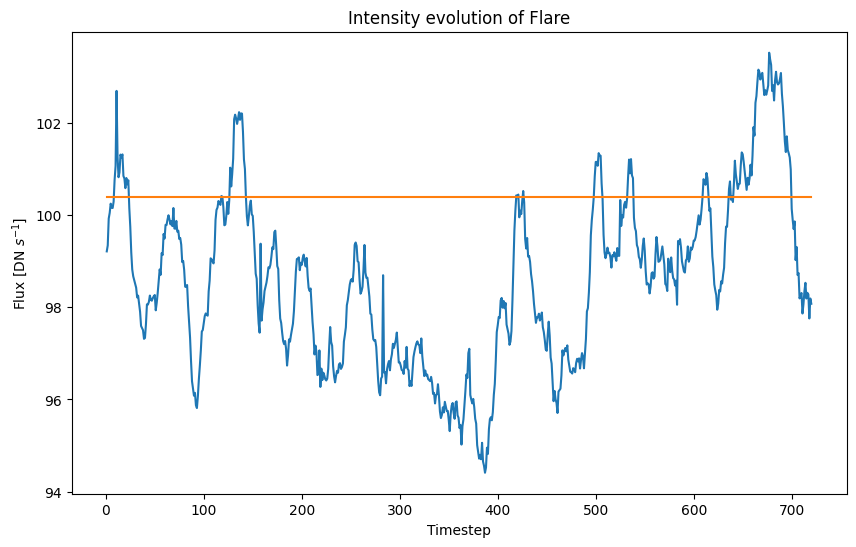

20140204_132917_3864257653 M1.5
99.35910387887922


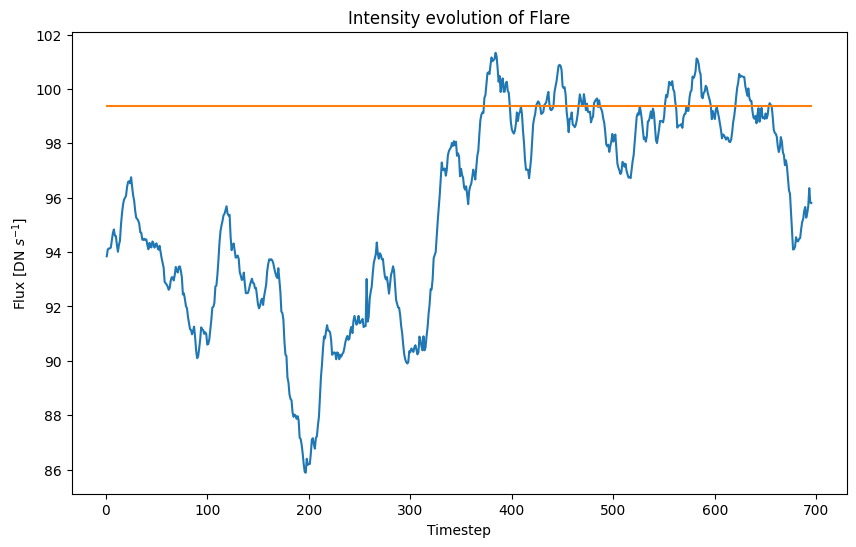

20140314_222929_3860261253 Fain
inf
20140331_024530_3860613353 M1.4
inf
20140415_095923_3864255652 C4.4
97.47370003570164


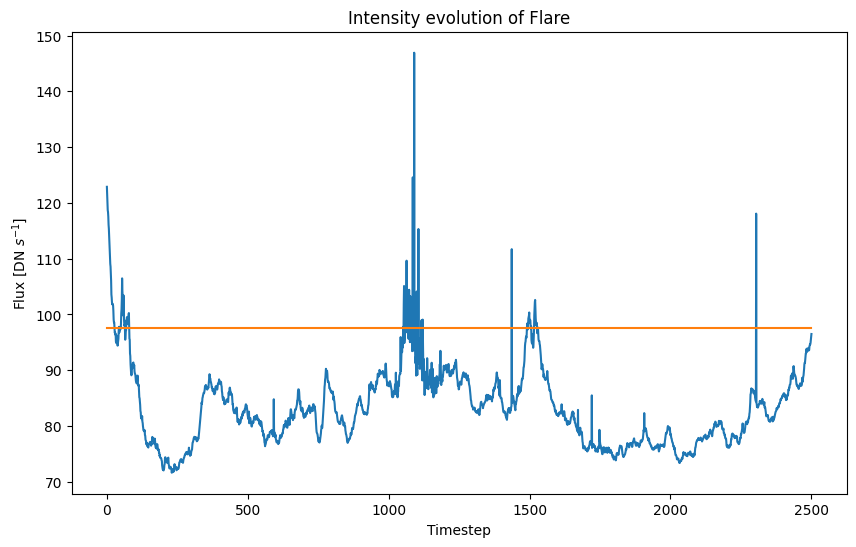

20140812_103738_3860258152 B9
inf
20140816_180538_3860009453 UT,
83.74862712125315


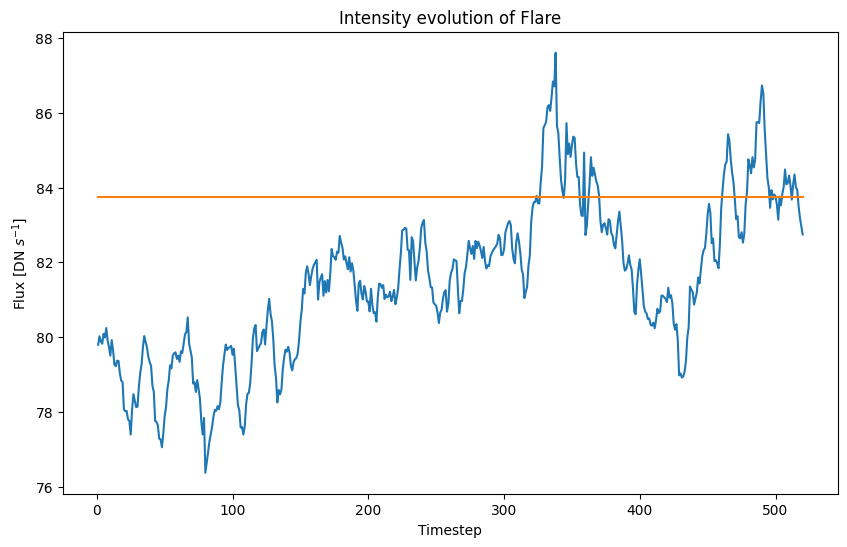

20140817_001006_3800111154 B9
inf
20140909_111018_3860259453 C3.2
inf
20140910_112825_3860259453 X1.6
inf
20140917_181834_3860107353 C7.5
inf
20141024_205222_3860111353 X3.1
inf
20141025_090038_3860259353 C4.6
inf
20141025_230138_3864109353 C8.4
inf
20141026_153158_3880106953 M1.0
445.81875587692736


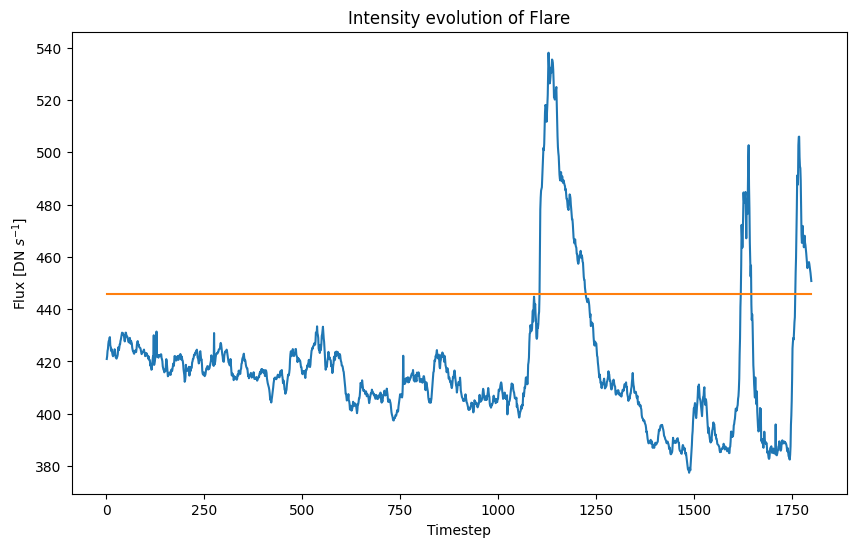

20141029_153000_3880606953 M1.0
inf
20150407_031143_3890113454 B8.2
259.50913241033334
20150408_194801_3880107054 C1.0
250.42717091555312


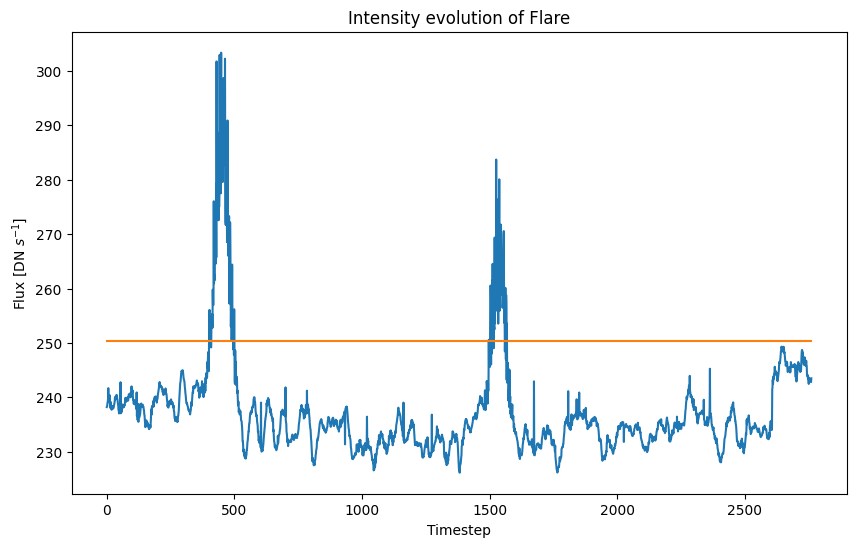

20150409_053917_3880107053 C5.4
303.22429724030957


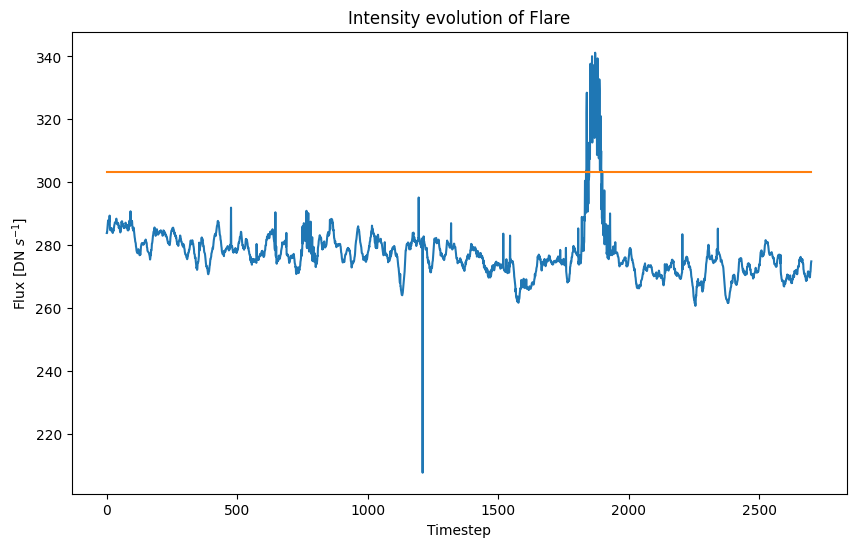

20150409_230117_3880107053 C3.3
255.56618615655498


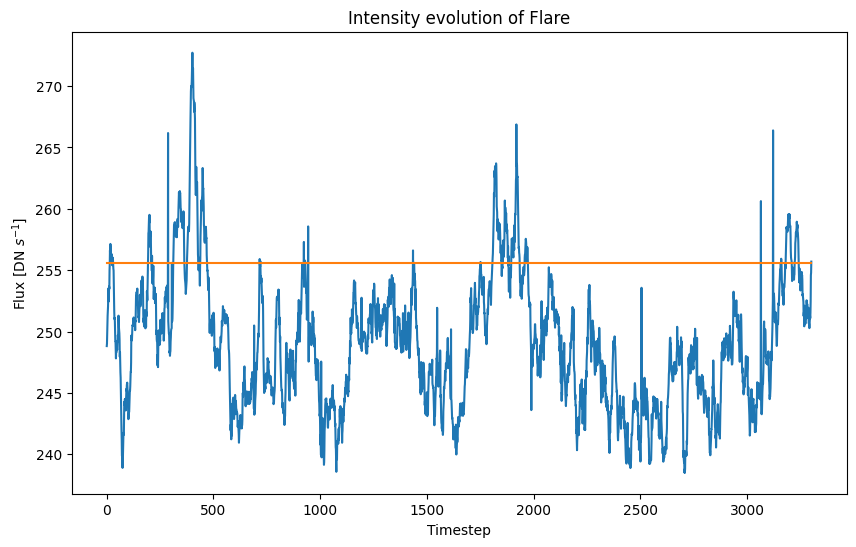

20150828_170000_3680606903 C8.0
inf
20150904_044923_3680008902 B4.4
72.10017805183524


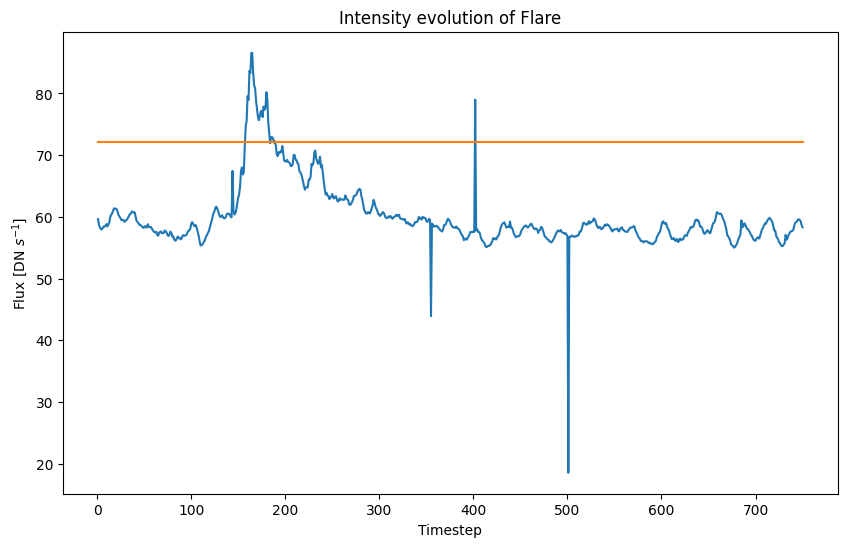

20150919_110921_3680088902 C1.5
127.63912692864182


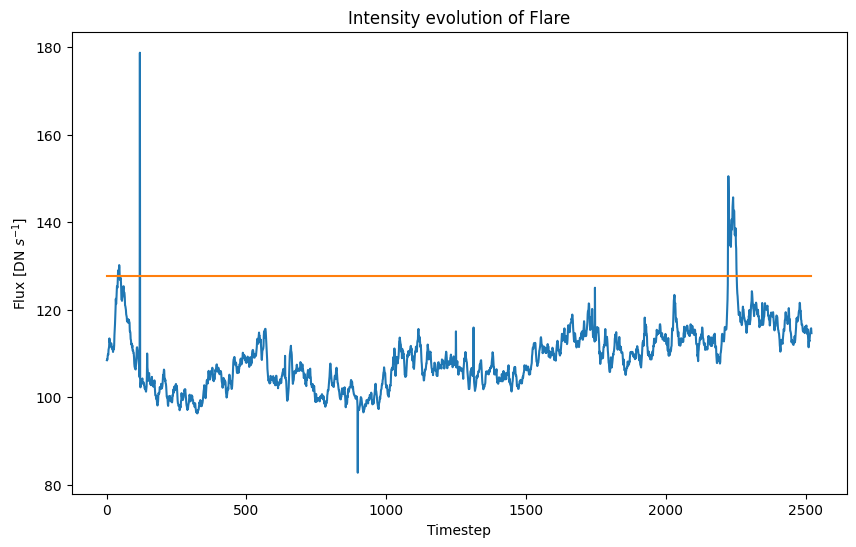

20151211_165724_3600025502 C5.6
inf
20151212_171028_3660261504 B9.4
0.6111756513483033


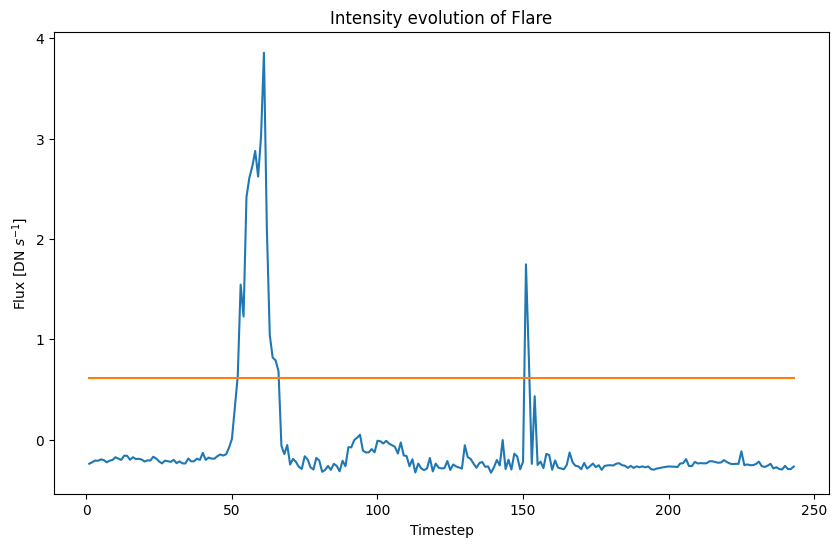

20151212_184757_3660261504 C1.1
inf
20151219_101113_3660104004 C1.6
119.70923565826246


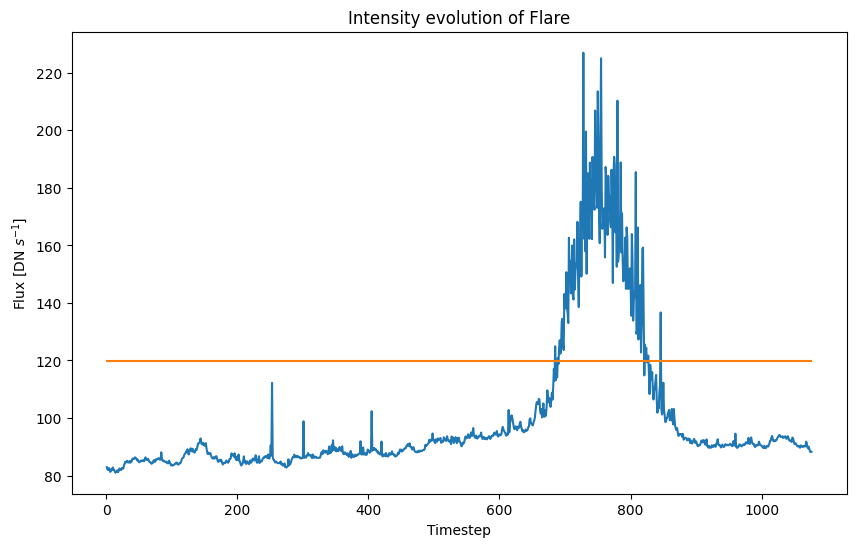

20151219_164113_3660104004 C1.1
111.74446398717468


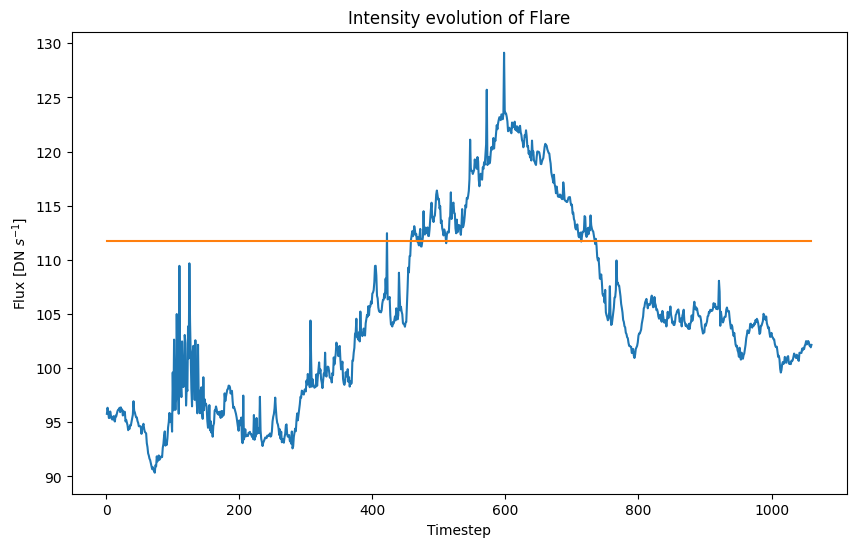

20151226_012330_3680088903 C1.6
104.50374318216907


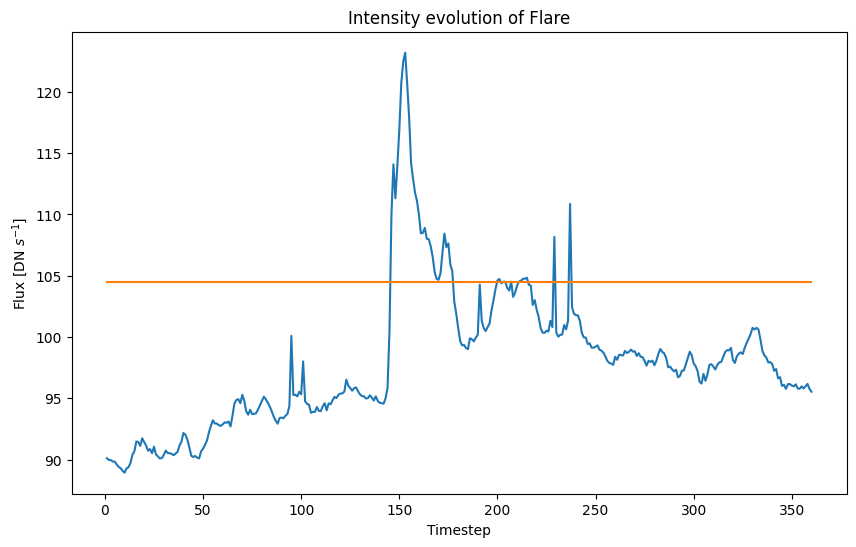

20151226_043828_3680088903 C7.8
102.4015860916258


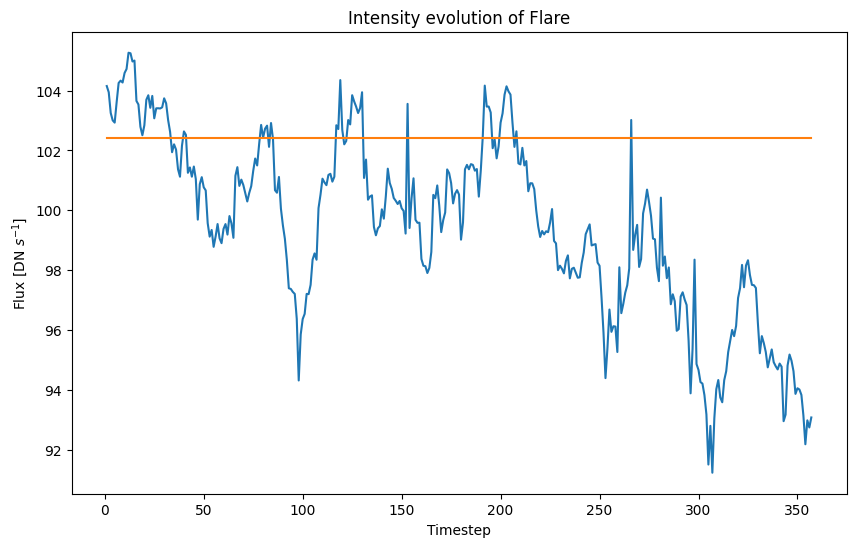

20151226_142321_3680086903 C4.1
96.66771544611095


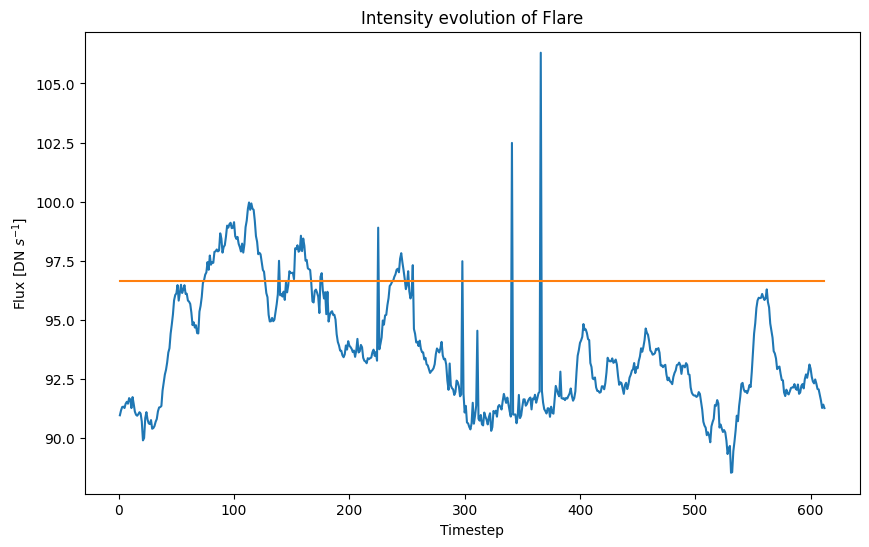

20151229_005235_3680088903 C1.4
124.74035062102608


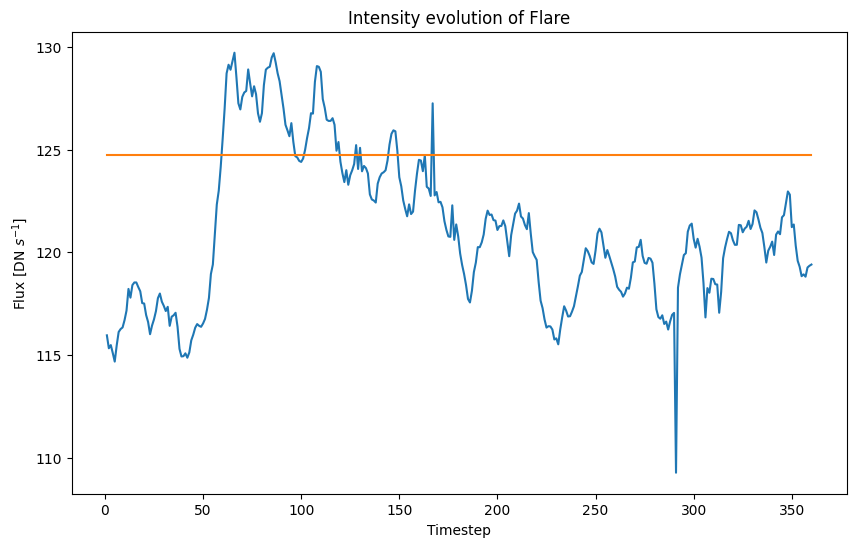

20151229_153017_3680086903 B8.3
inf
20160218_184911_3660259503 C1
8.250881863575703


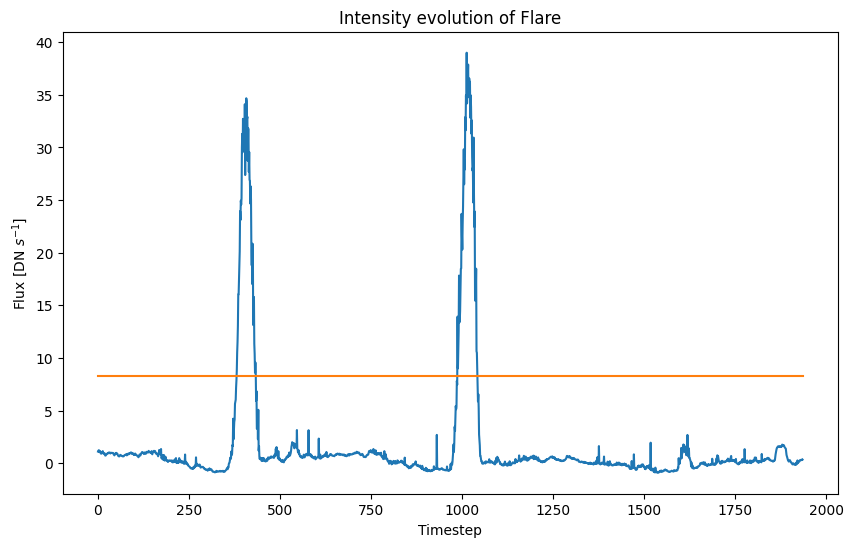

20160626_155928_3600261302 B3.8
42.65155361399148


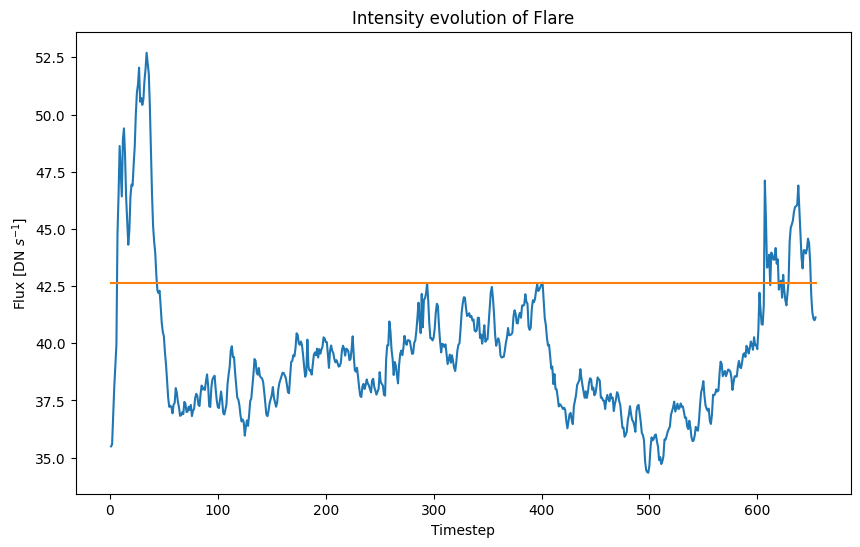

20160809_160917_3664107503 B3.5
229.01343839516954


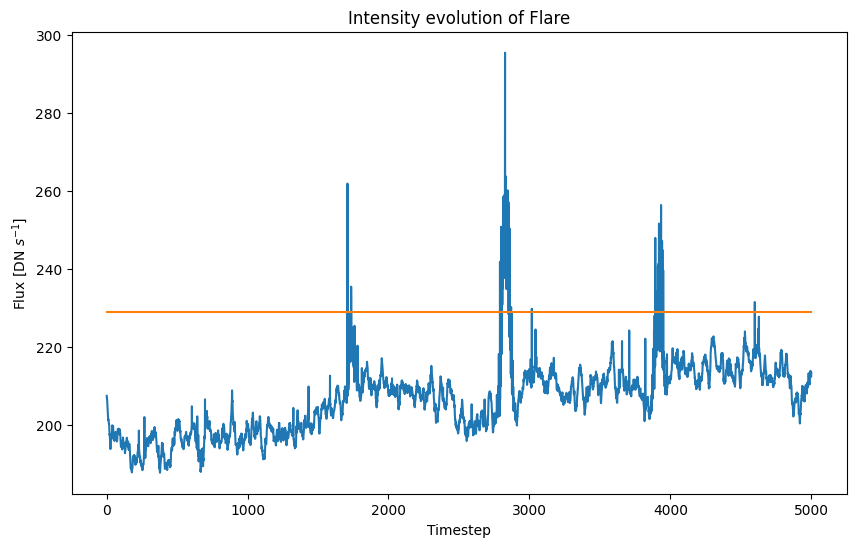

20160811_161417_3664107503 C2.4
214.2910623723123


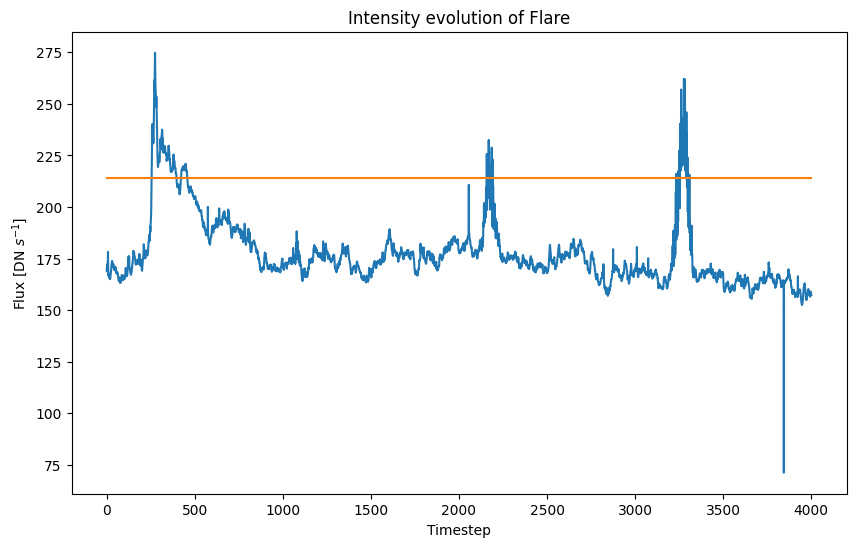

20170331_220945_3600030003 C1.1
87.22066068193696


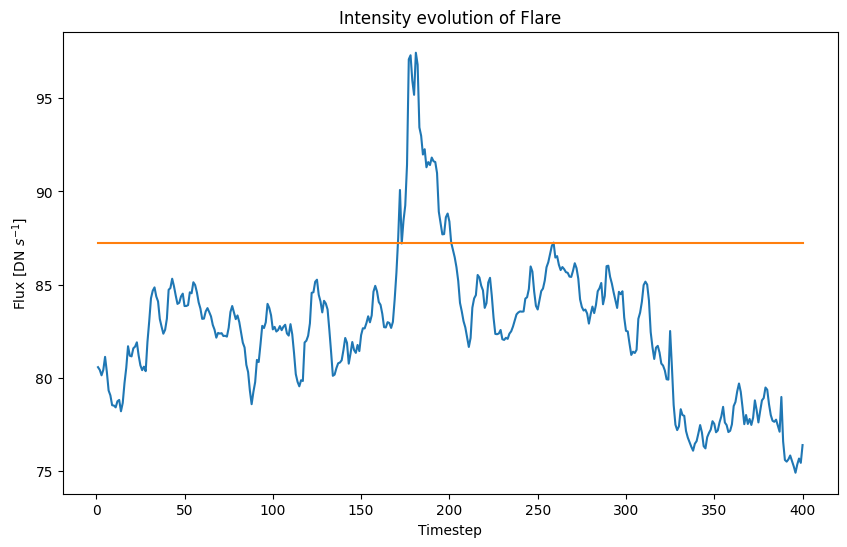

20170422_100054_3690115103 B1.8
178.22679135926313


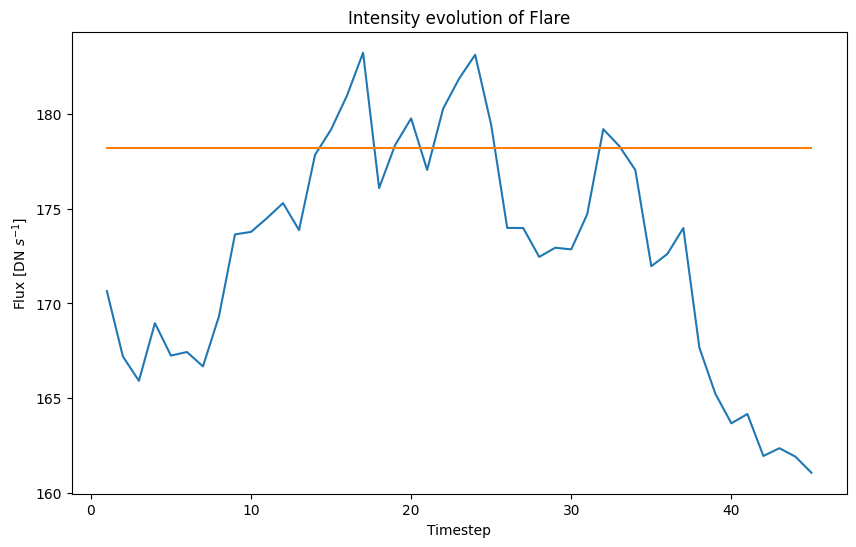

20170707_094050_3690115104 B2.5
94.06522678602444


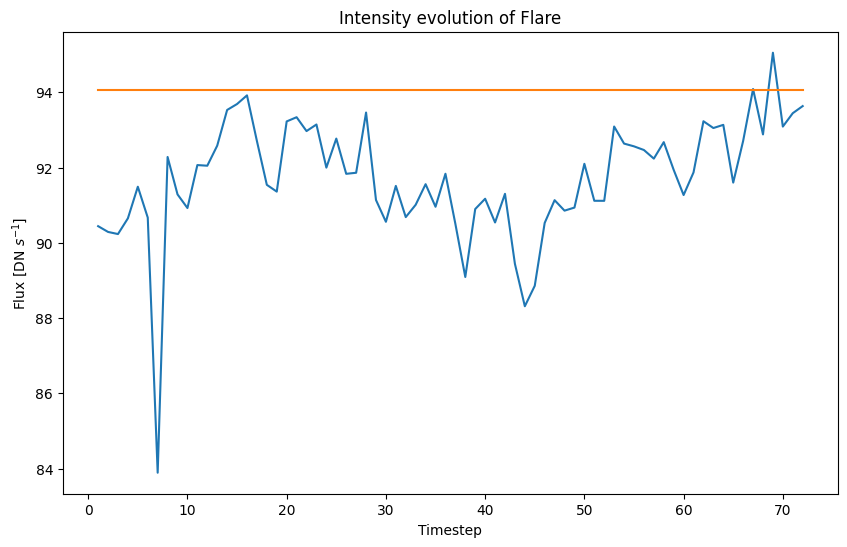

20170708_082250_3690115104 B6.5
184.41107647680067


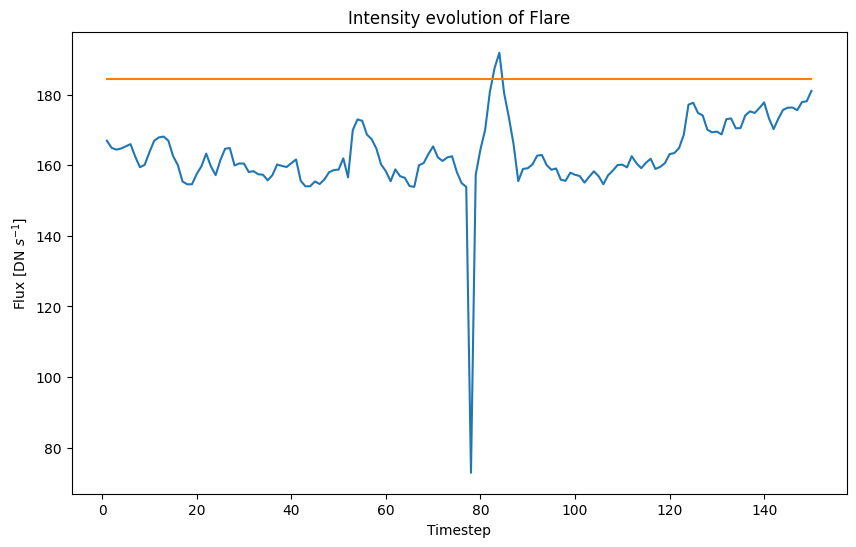

20170717_160052_3690115104 C1.2
nan
20170717_232705_3600108004 B7.3
inf
20170718_080551_3600108004 C1.7
53.709420956722056


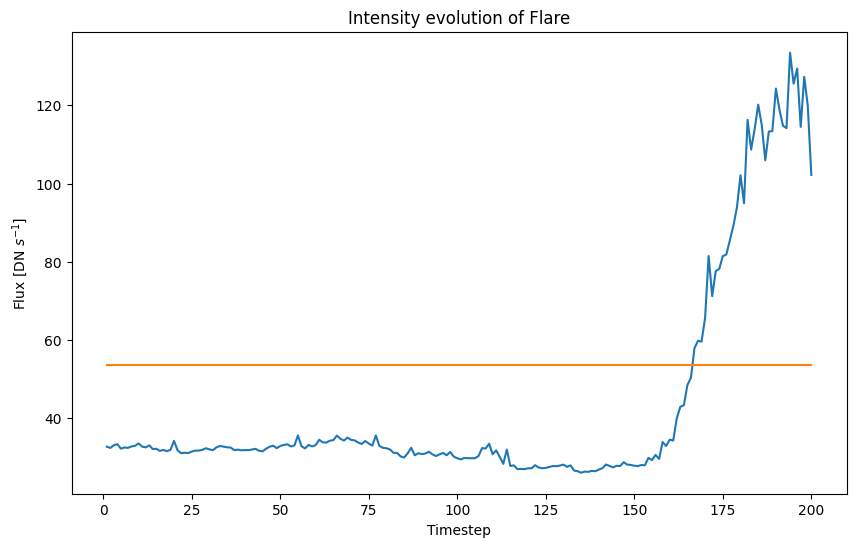

20170909_051958_3680108902 M3.7
279.8617189130852


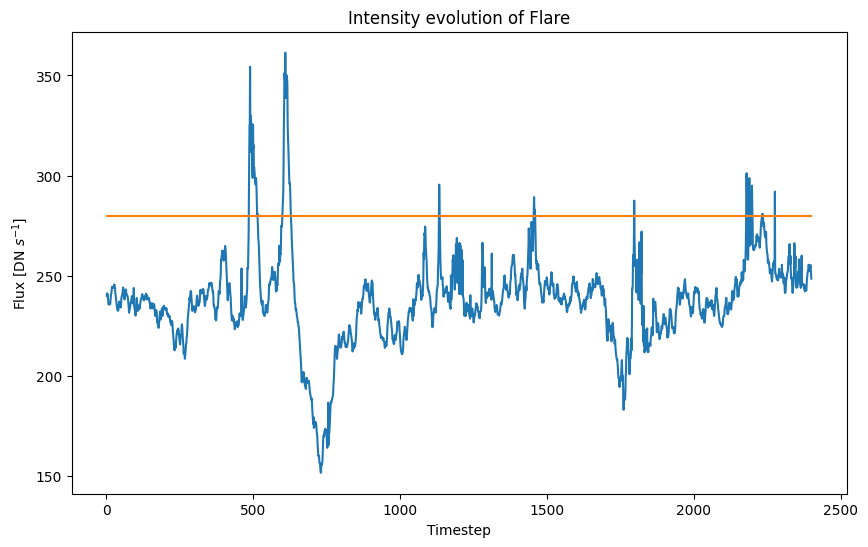

20171215_210525_3600009103 Uncl
nan
20201207_011835_3660259103 B3.8
19.083436885870693


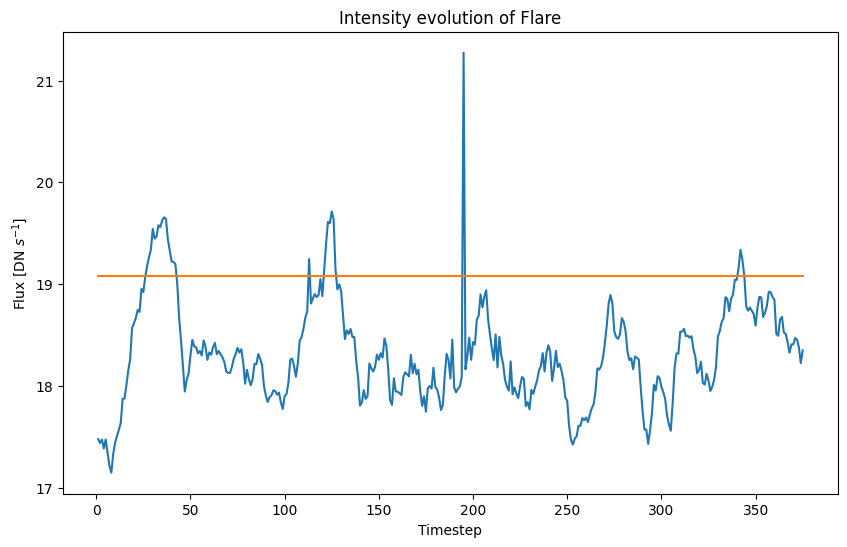

20201210_120751_3660259103 B3.1
22.764694005468964


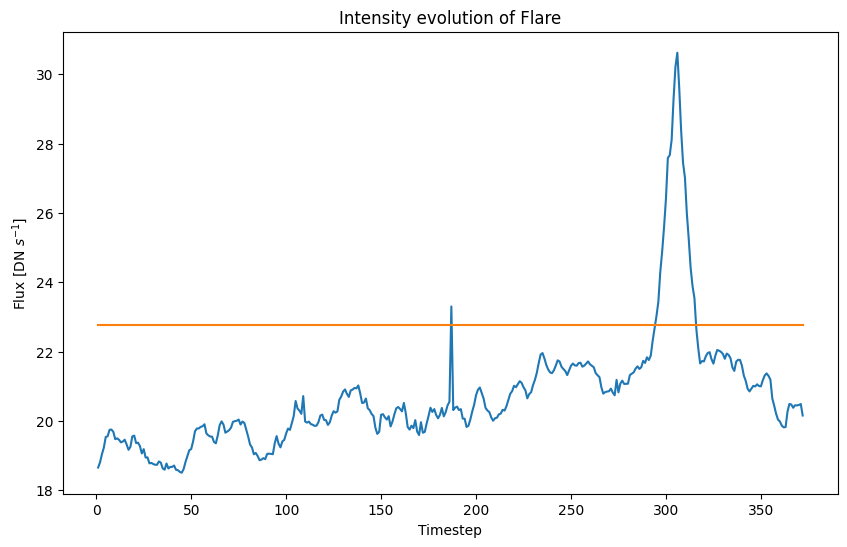

20210121_091650_3680259103 B1.1
49.081246984900716


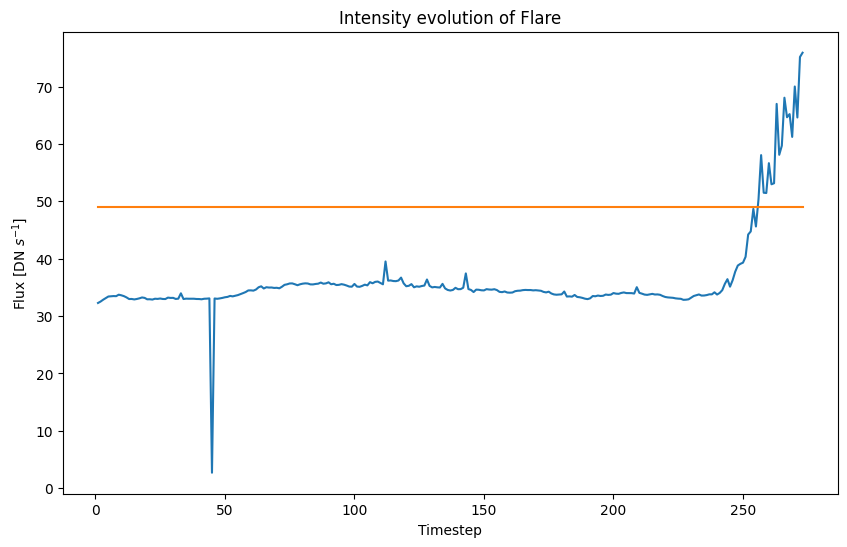

20210122_093801_3680259103 B1.5
50.432801379119155


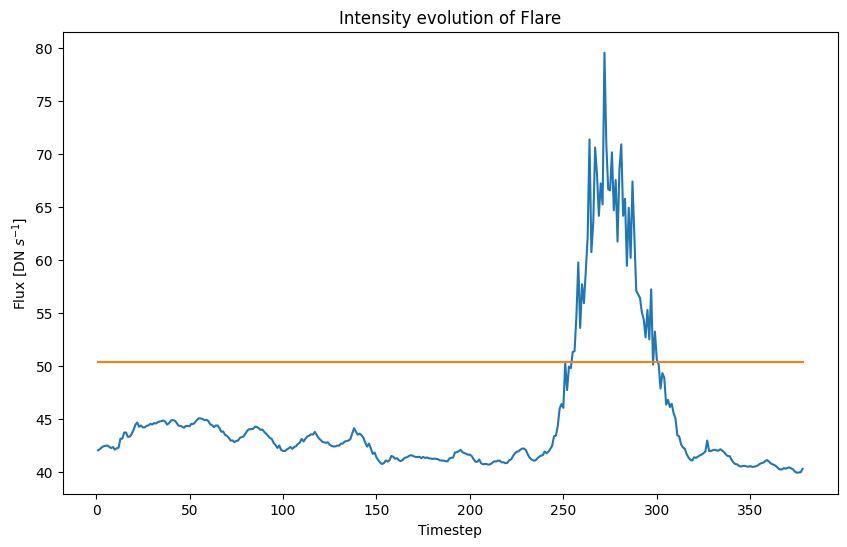

20210210_112824_3660259103 B5.7
28.88722798390833


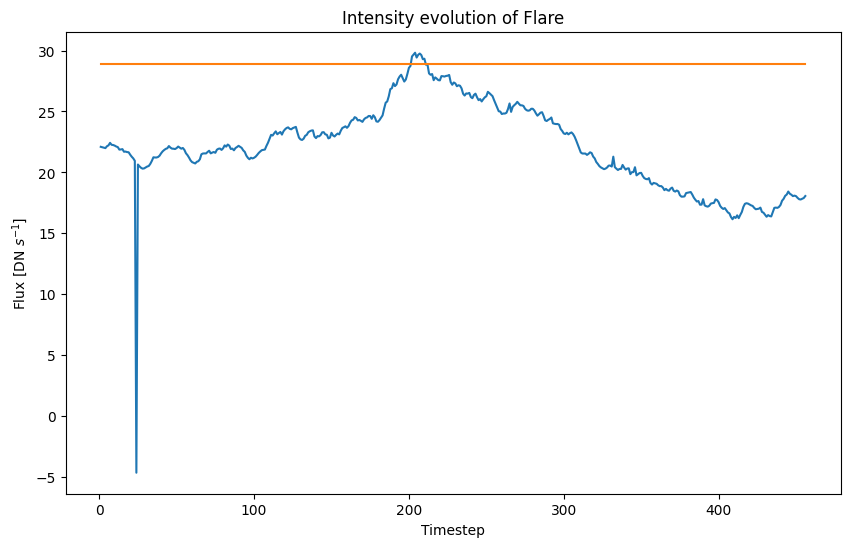

20210312_174401_3660259102 B2.5
40.81922517470749


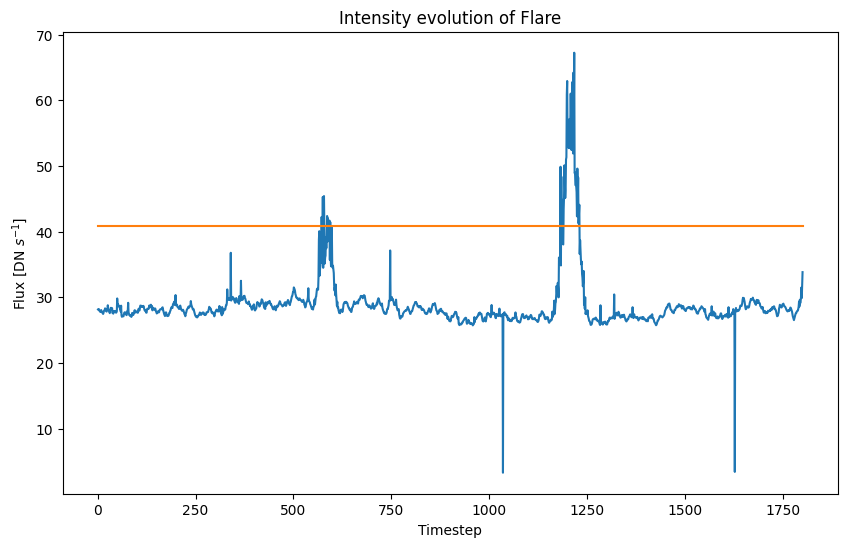

20210716_155936_3680259103 B1.9
41.74363977746367


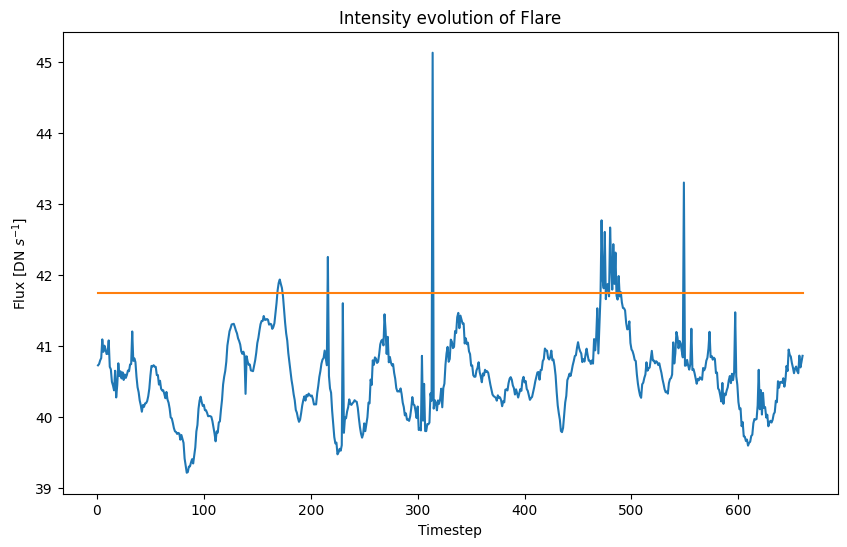

20210723_121738_3660259102 B2.9
55.77134670614482


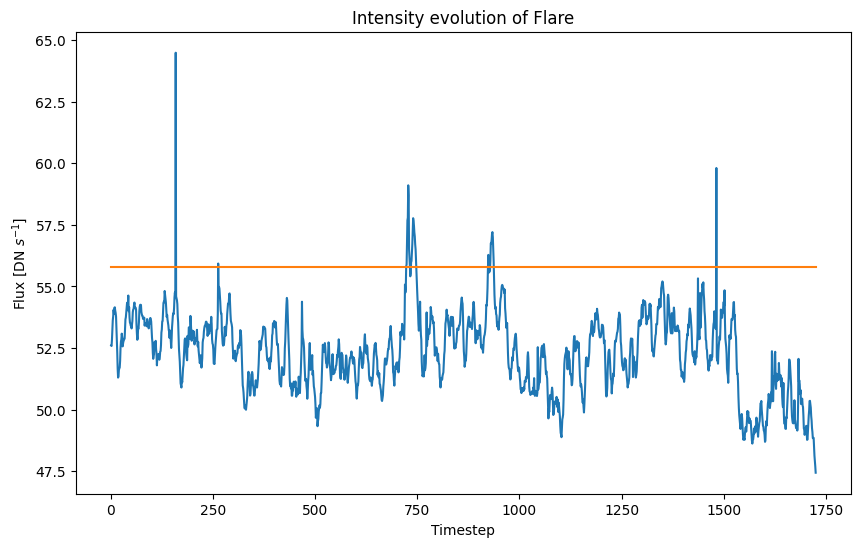

20210908_161659_3603013104 C8.3
inf
20211028_153938_3660259102 N/A
66.52519346143123
20211204_185057_3680259103 C1.2
13.41474461698196


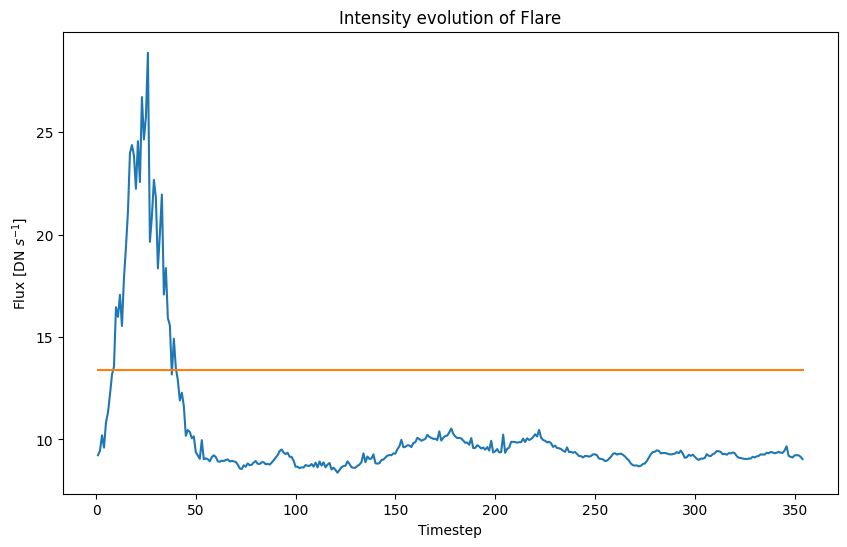

20211229_112824_3664103603 N/A
159.08798342342942


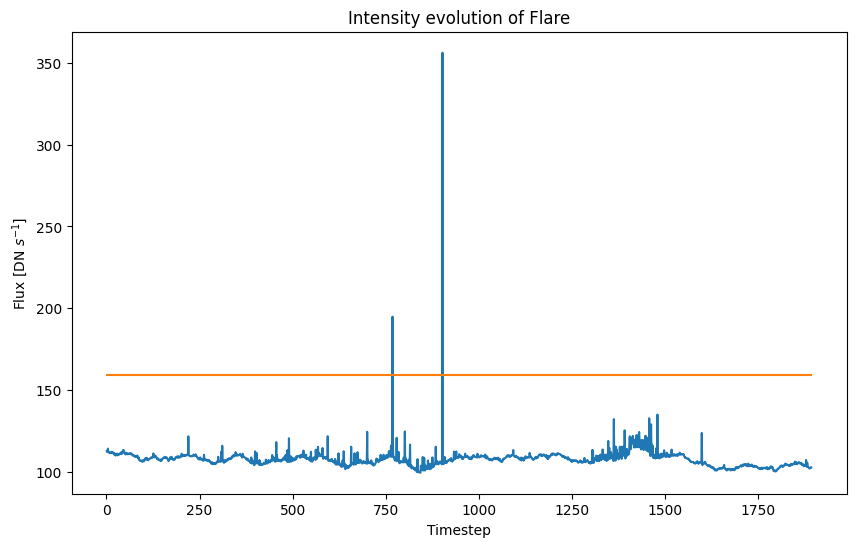

20220130_063231_3660259102 C1.6
41.67184746698336


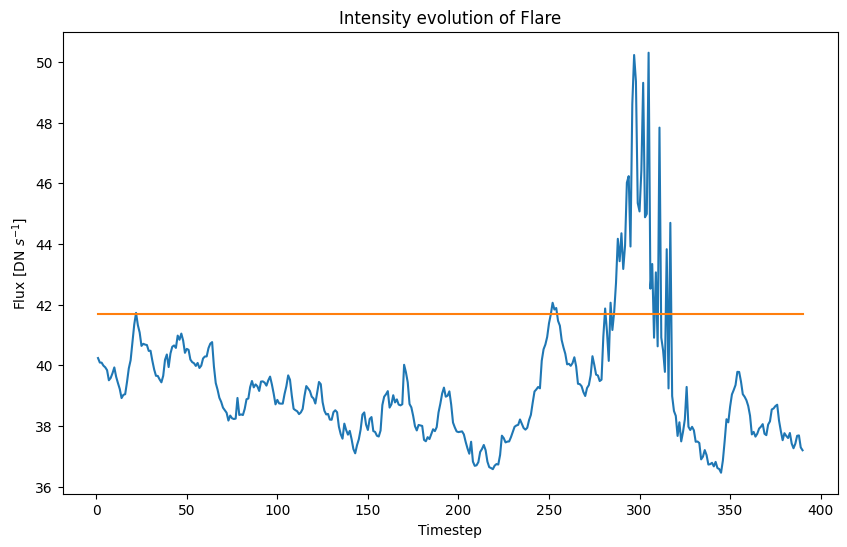

20220311_142528_3660259102 C1.6
inf
20220312_144643_3660259102 B2.1
51.2381160706142
20220315_141922_4204700135 C1.0
110.47701541524951


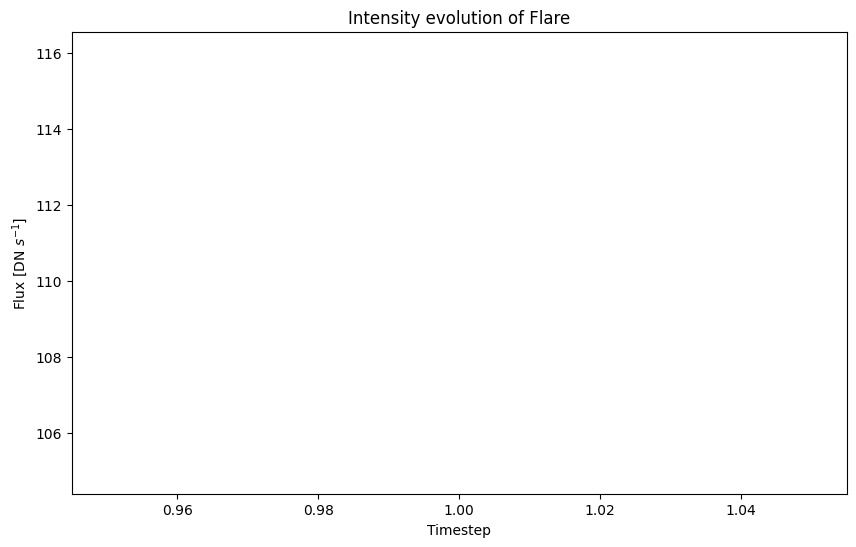

20220316_000922_4204700135 M1.5
141.42820286076315


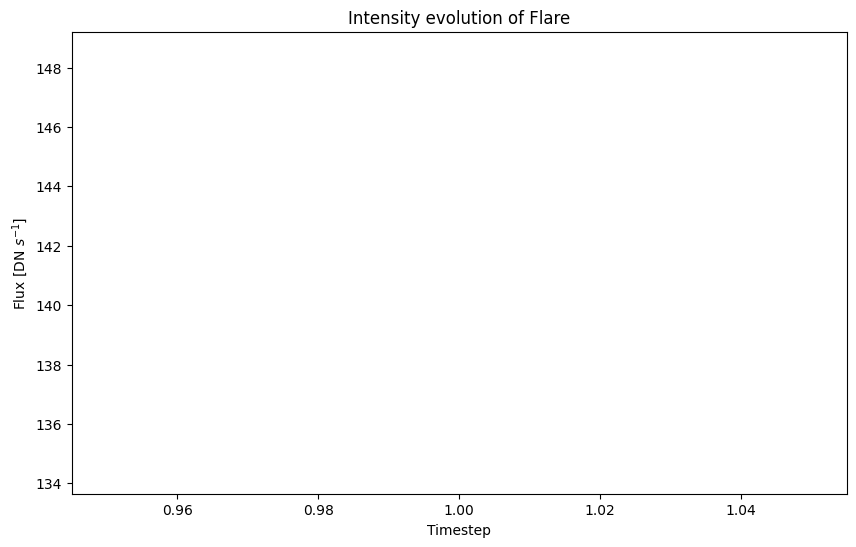

20220330_161411_3660259102 X1.3
59.26308855321073


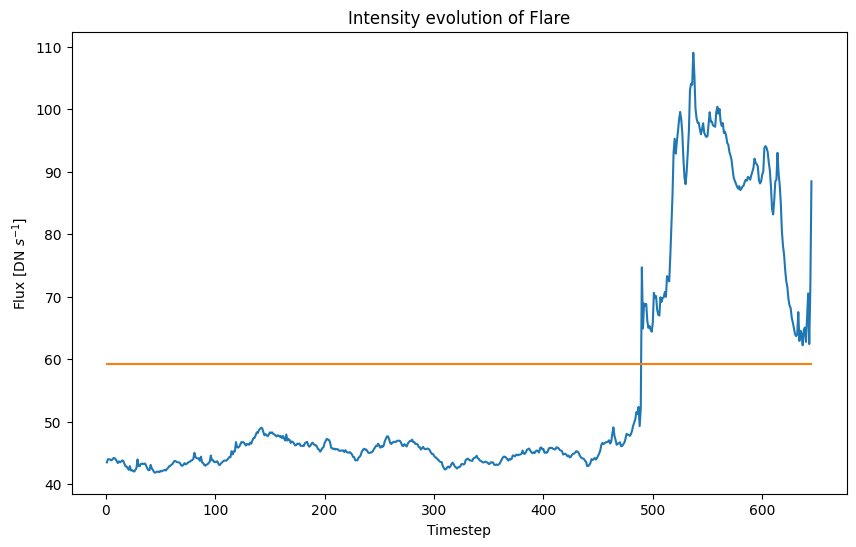

20220402_171733_3660259102 M4.3
47.293510620441836


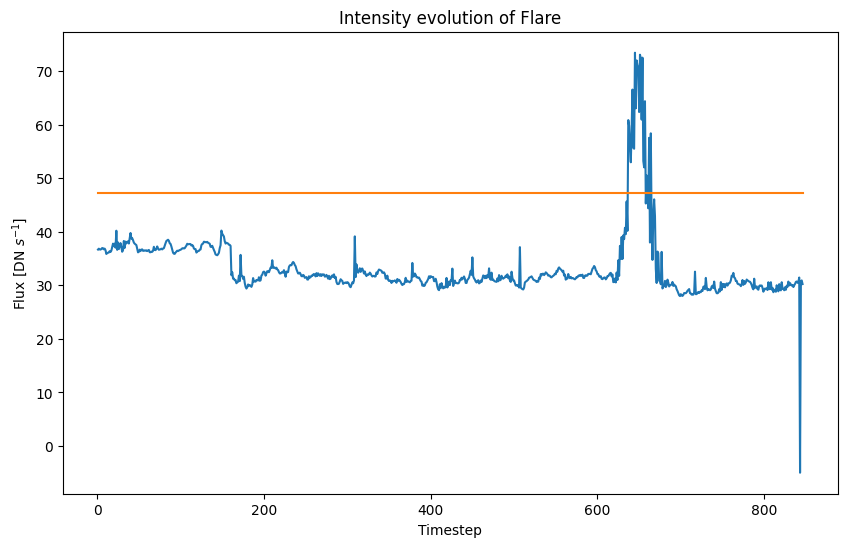

20220403_033856_3660259102 C2.0
25.040715740623444


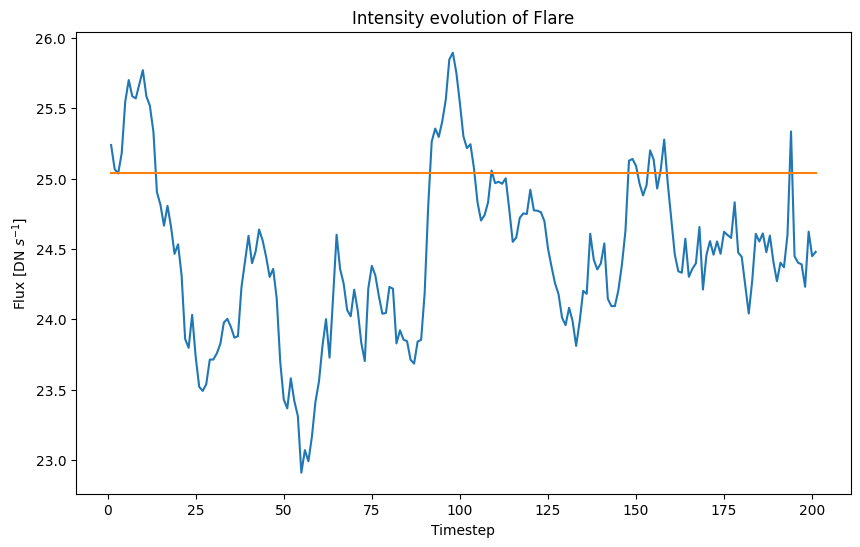

20220505_134509_3660259102 M2.7
52.48542824718972


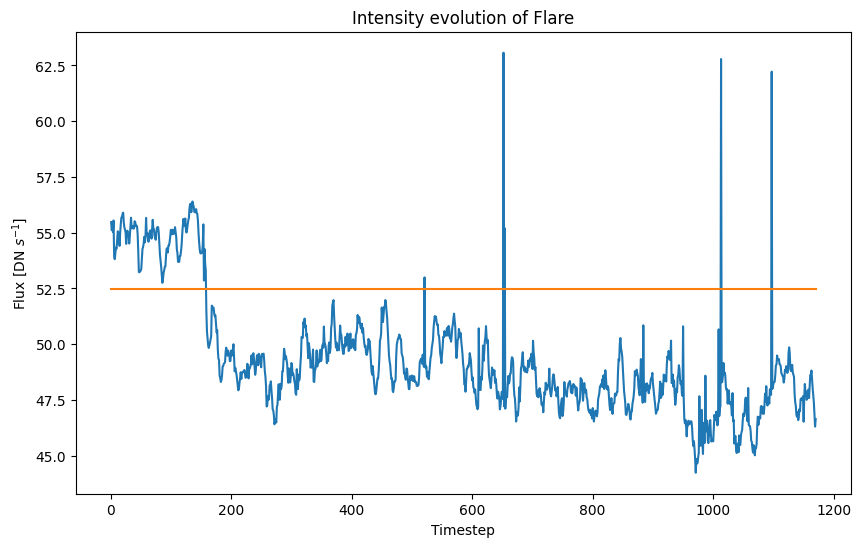

20220511_221150_4204700135 N/A
72.33848506048709


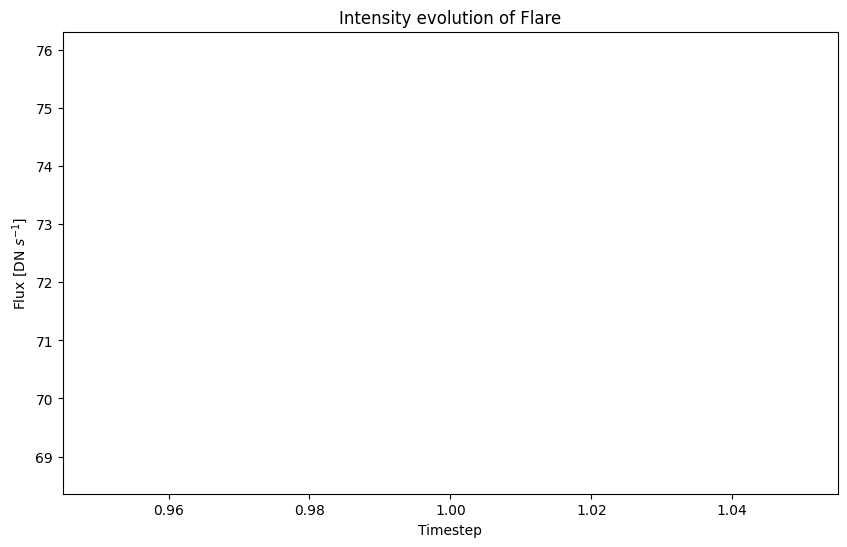

20220512_073837_3680108603 C2.8
174.37491224758583


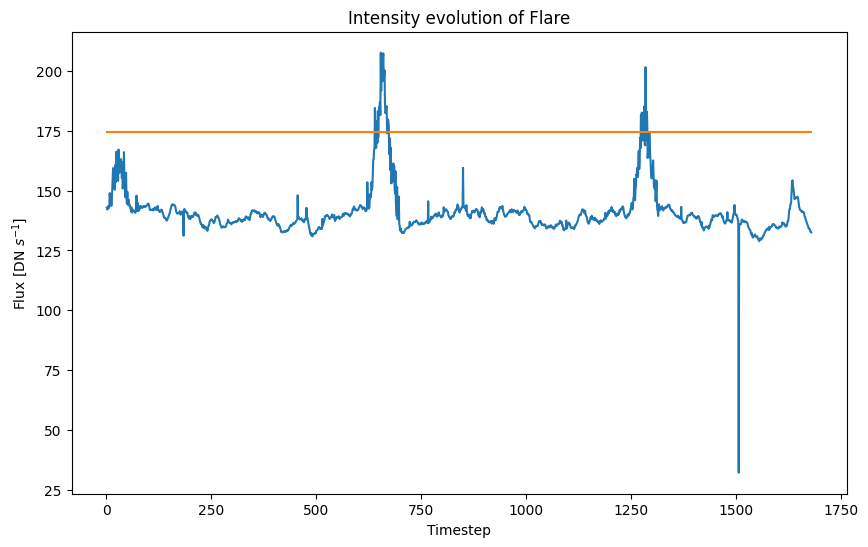

20220518_044822_4204700135 C2.5
114.00042028459082


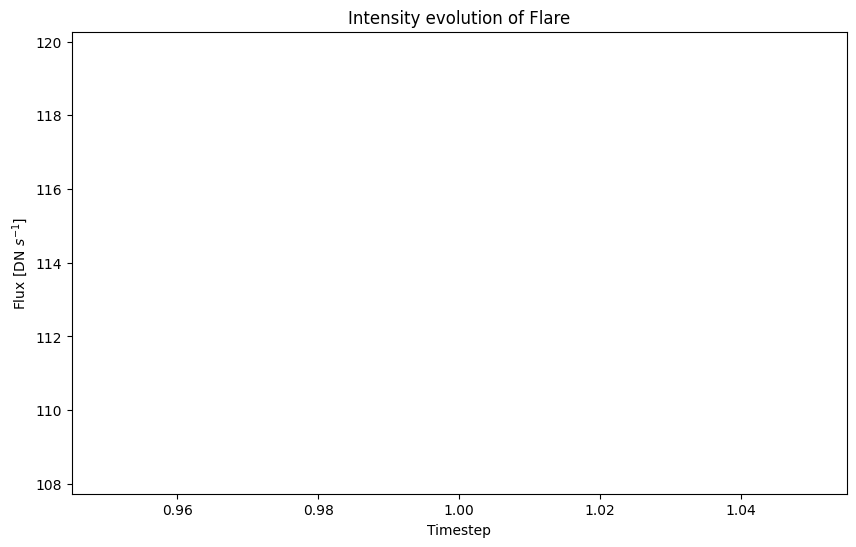

20220523_073036_3660259102 C5.2
inf
20220524_115705_4204700135 C3.6
174.648867911839


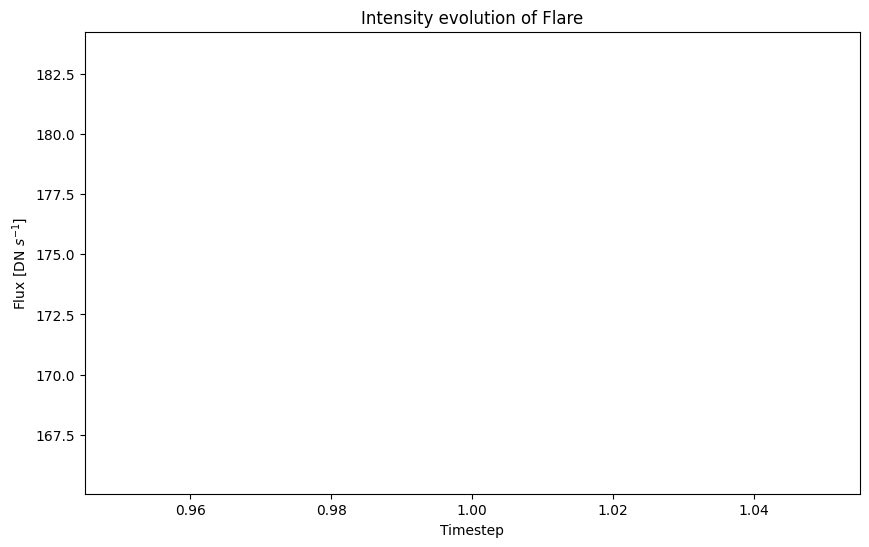

20220803_160452_4204700135 C6.9
149.727773074293


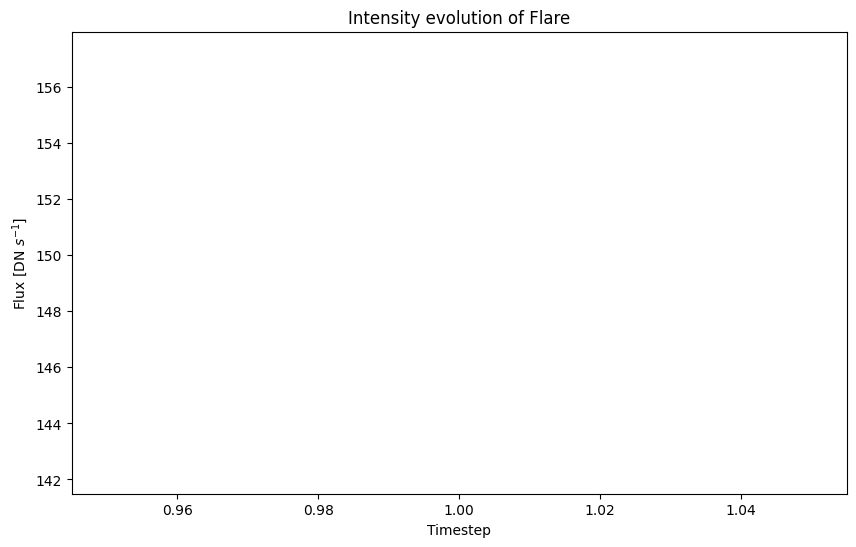

20220817_104936_3660259102 N/A
42.65814521346568


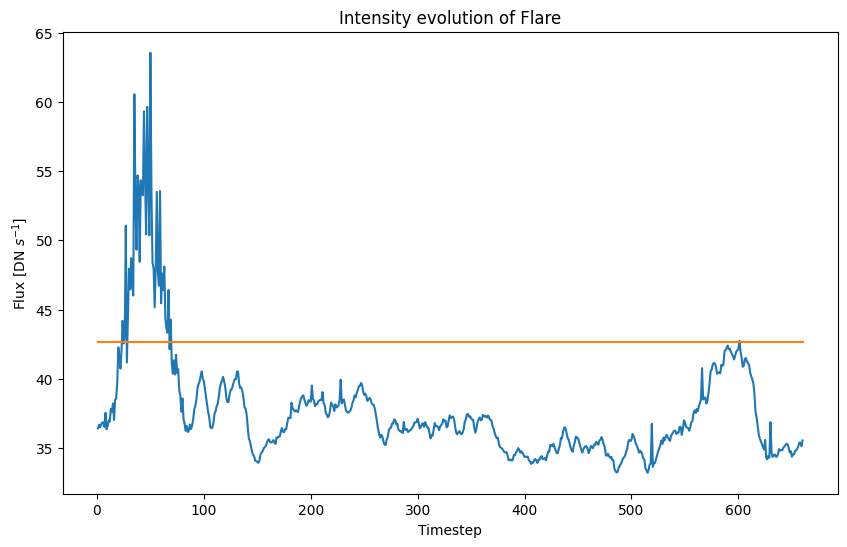

20220818_080922_4204700135 C3.6
143.21074922653514


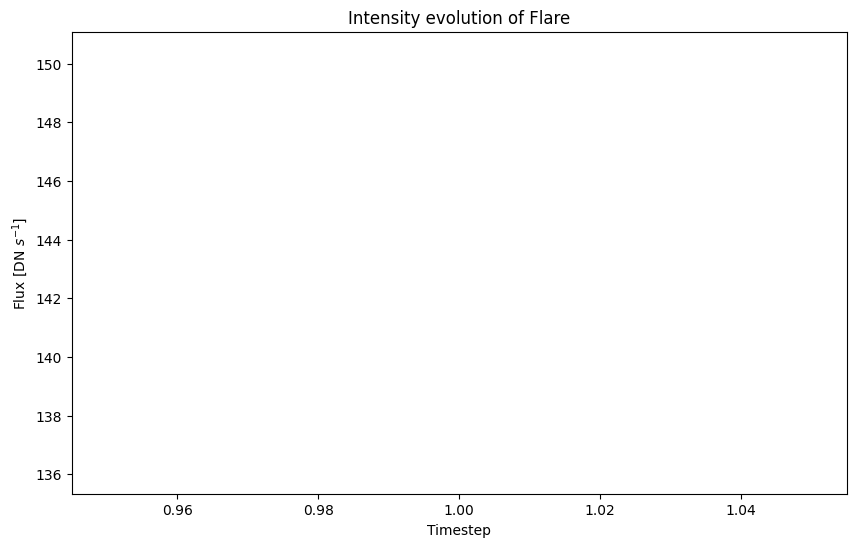

20220818_133436_3660259102 M1.3
36.33638531617843


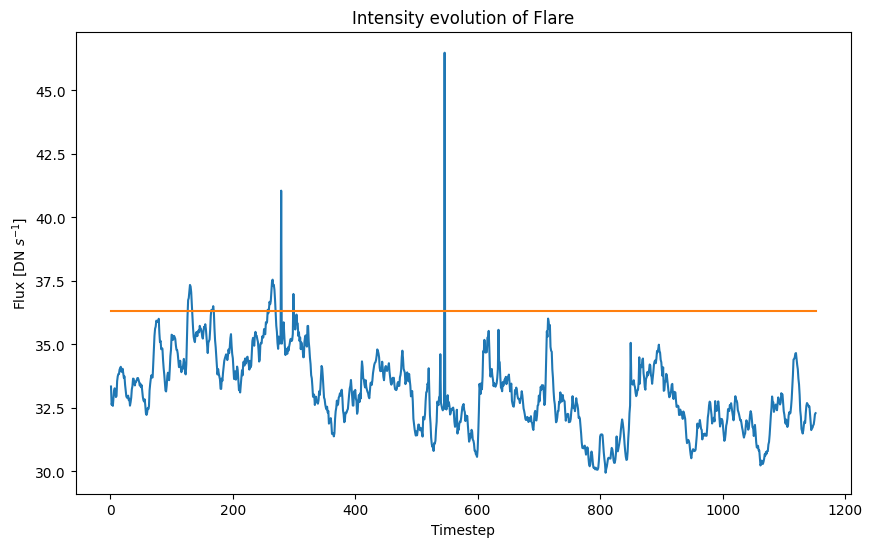

20220819_070922_4204700135 C4.5
98.96396512608447


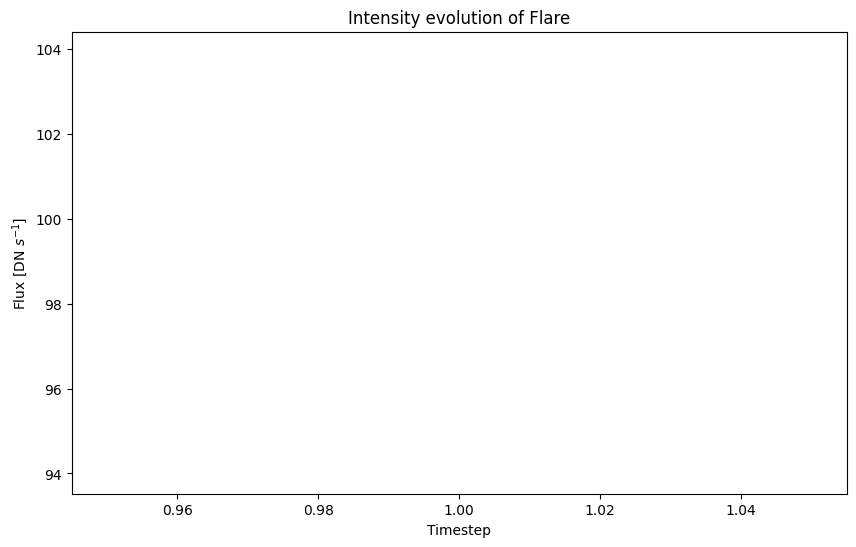

20220819_115936_3660259102 B7.5
37.13754040086107


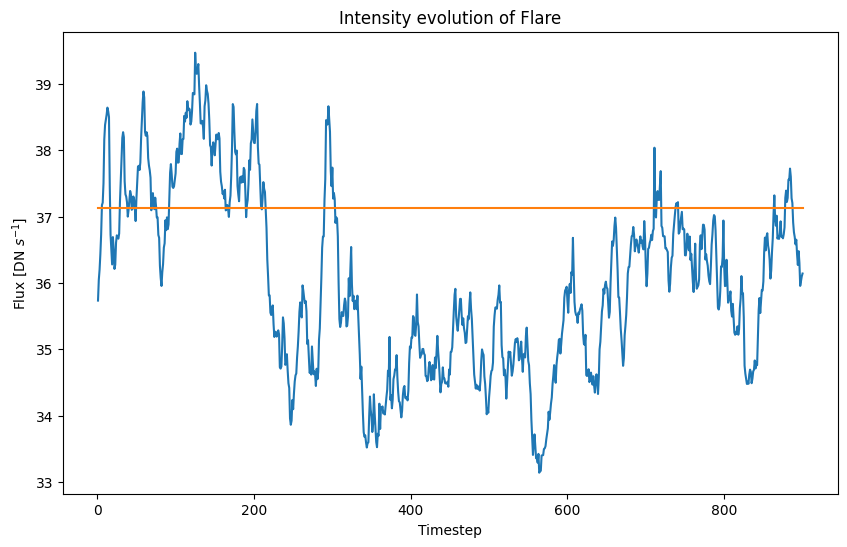

20220821_024436_3660259102 B3.5
34.96359504529868


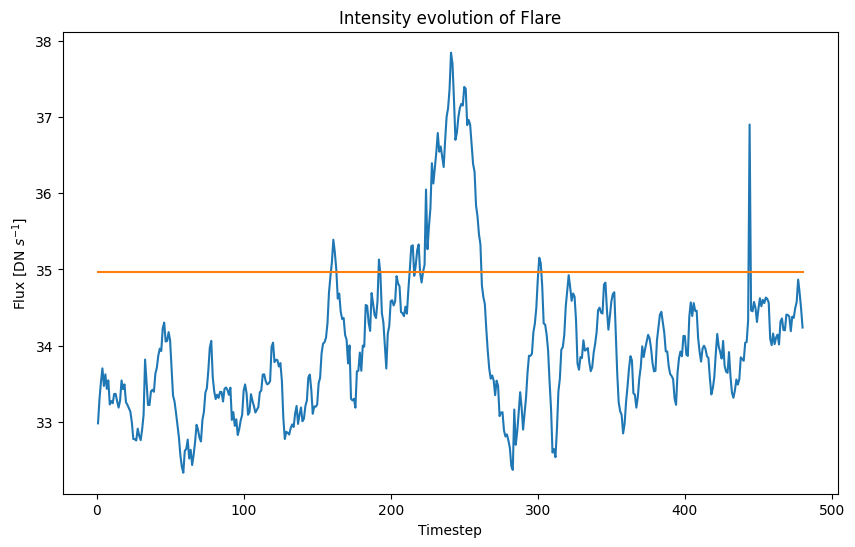

20220827_063222_4204700135 C8.8
194.984646599742


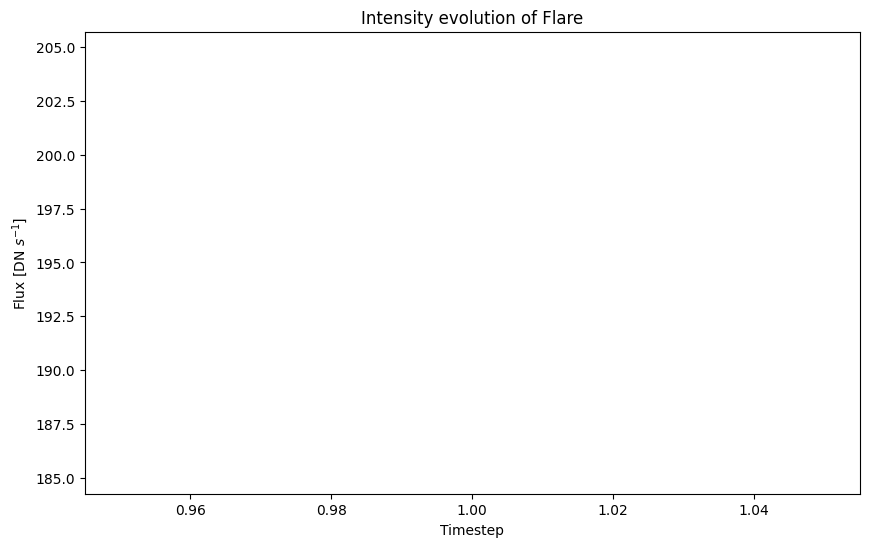

20220831_073000_4204700140 C4.3
53.09143529090205


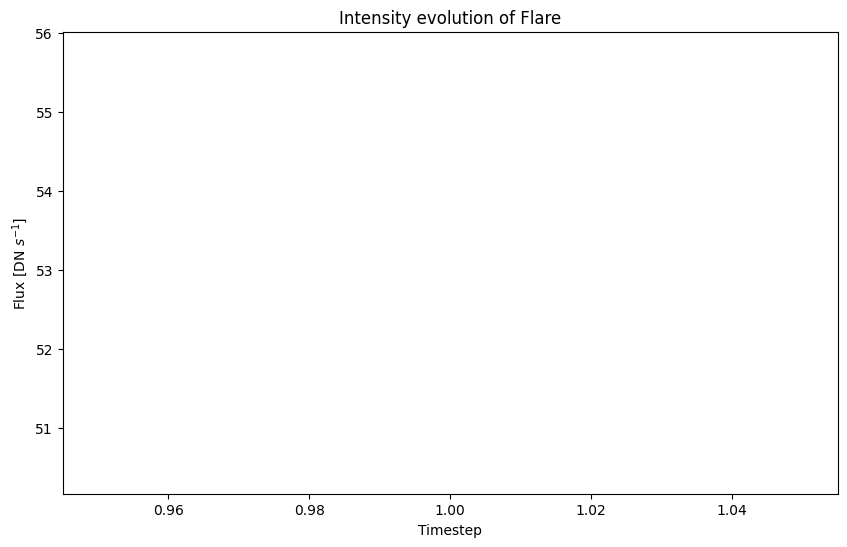

20220902_195925_3660259102 C1.8
58.98717646755313


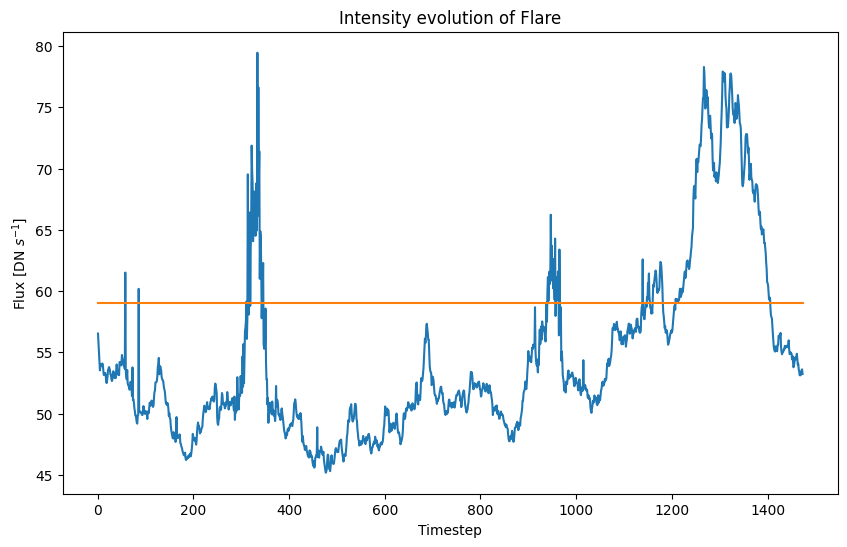

20220903_121015_3660259102 C2.1
44.324283202783526


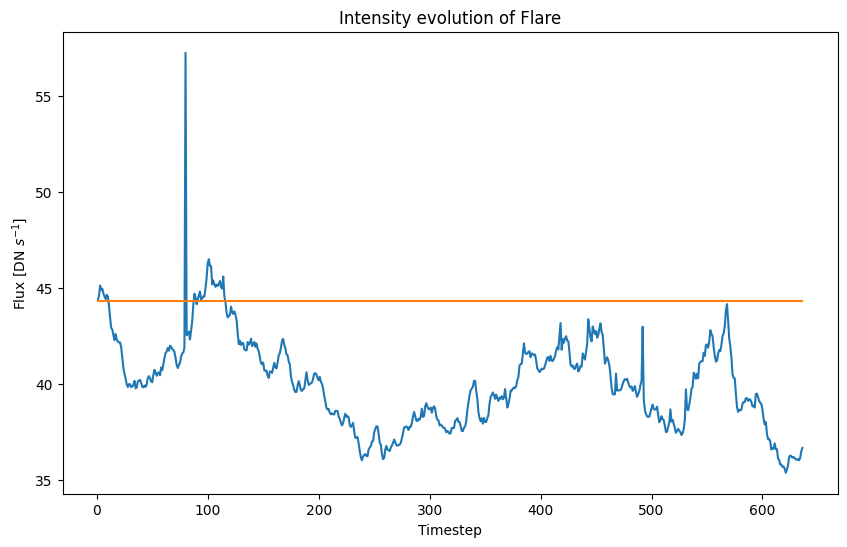

20220903_201856_3660259102 C2.8
56.13254019812531


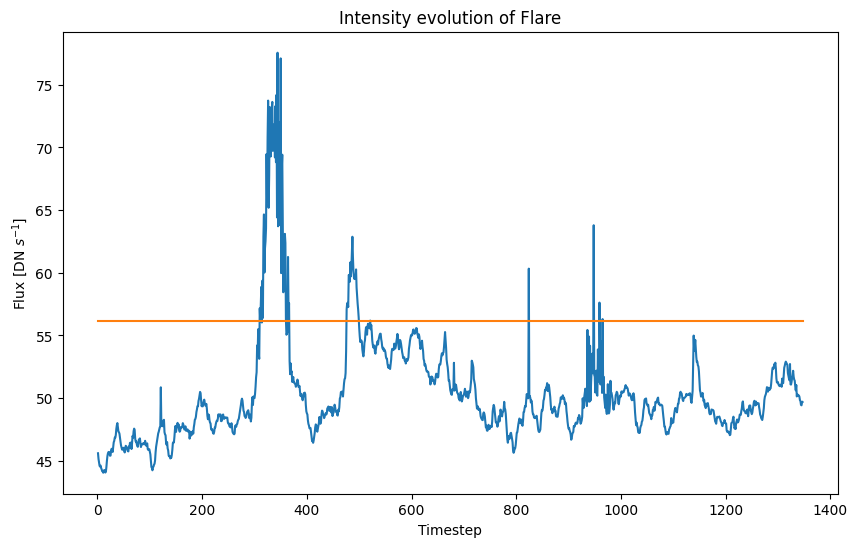

20220906_073000_4204700135 C4.0
1.9940520834098665


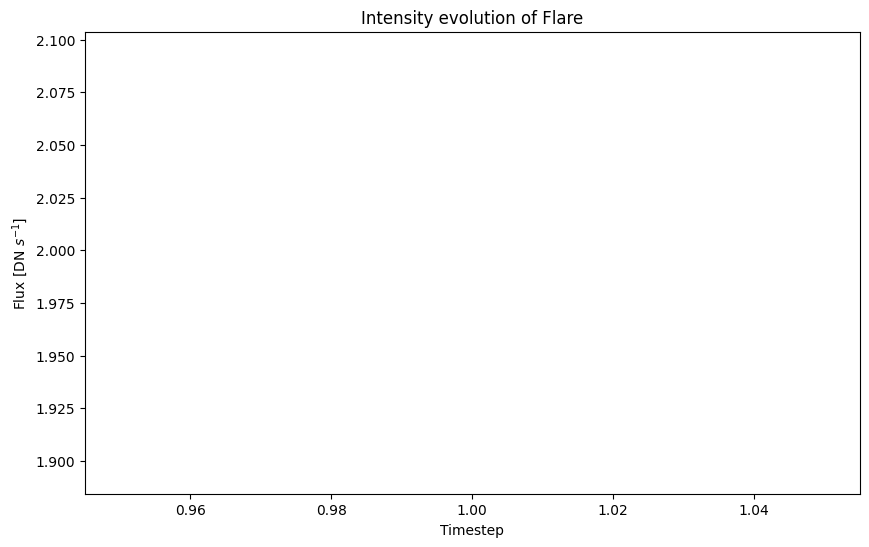

20220912_121036_3660259102 C6.3
57.55435685842638


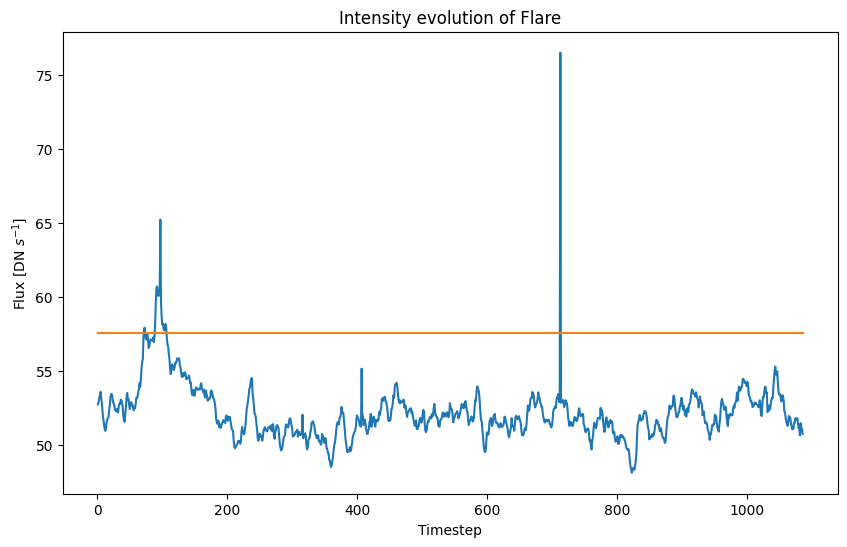

20220920_151841_3660259103 C3.8
53.09193645888505


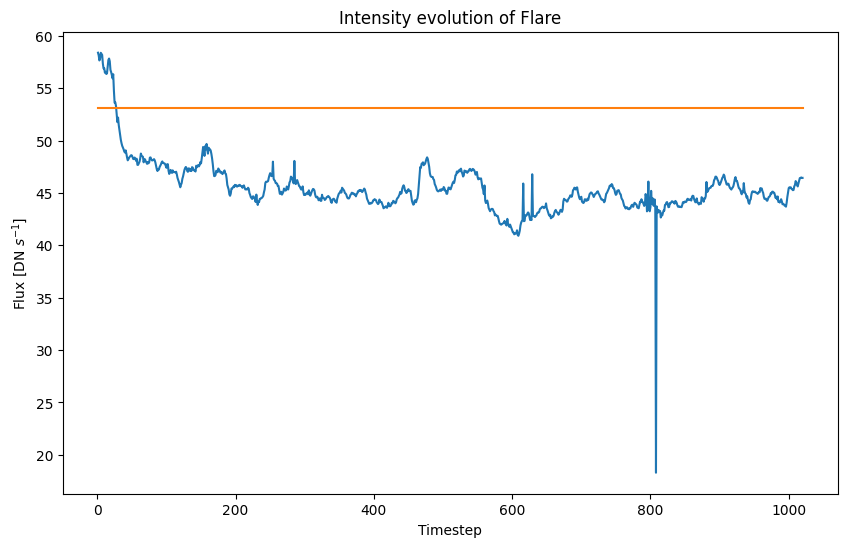

20220923_103842_3690133103 N/A
18.62725731595403


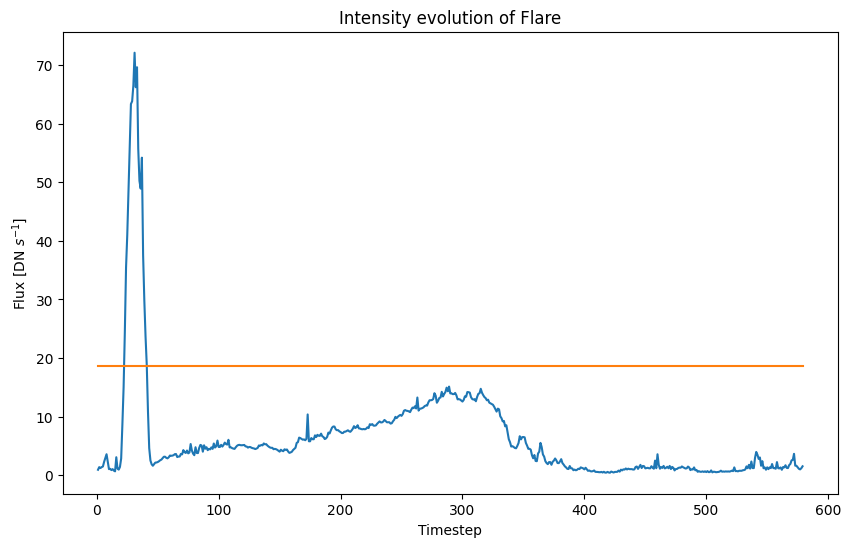

20220924_062328_4204700136 C3.0
164.99605004374527


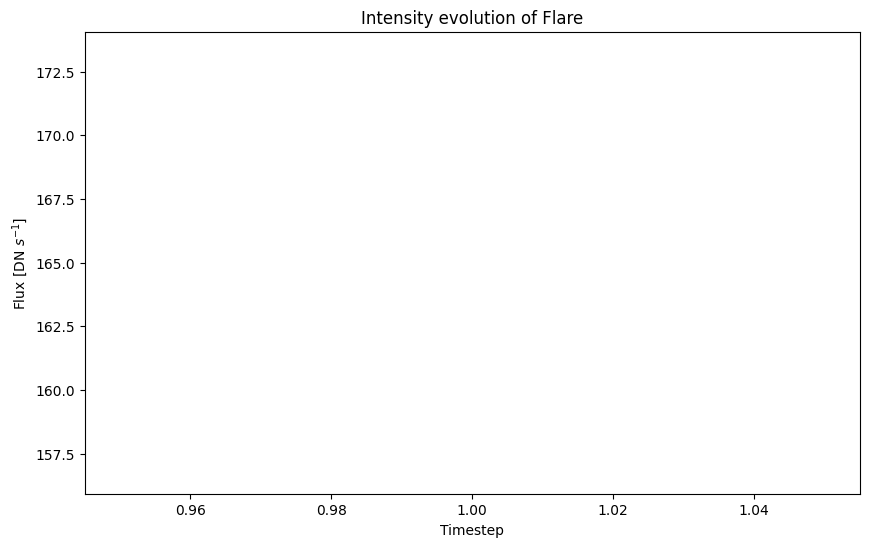

20221215_102147_3664103603 M.1
237.87142975265743


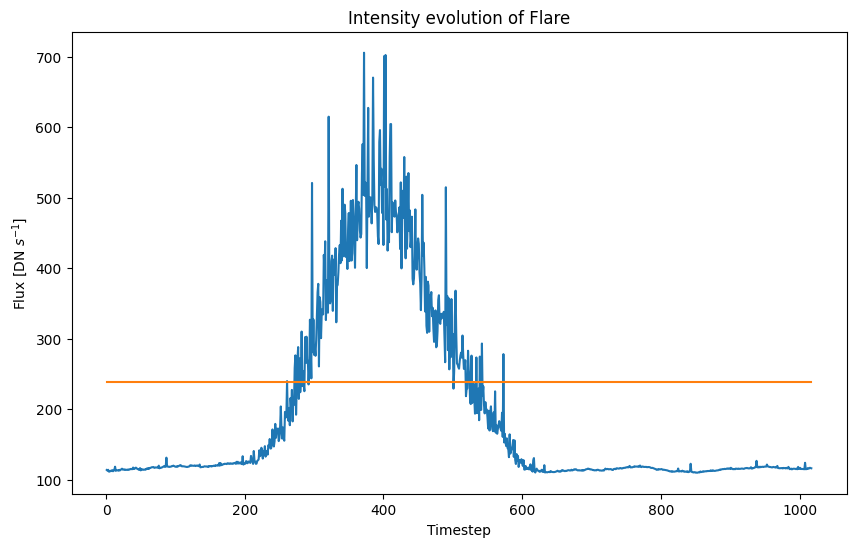

20221215_113222_3664103603 C6.0
187.7516025255319


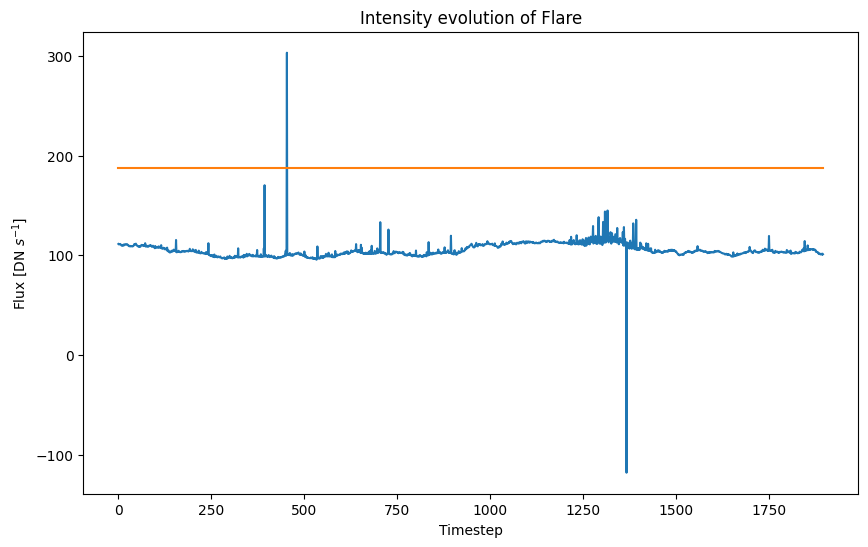

20221215_130945_3664103603 C8.2
123.7913721964888


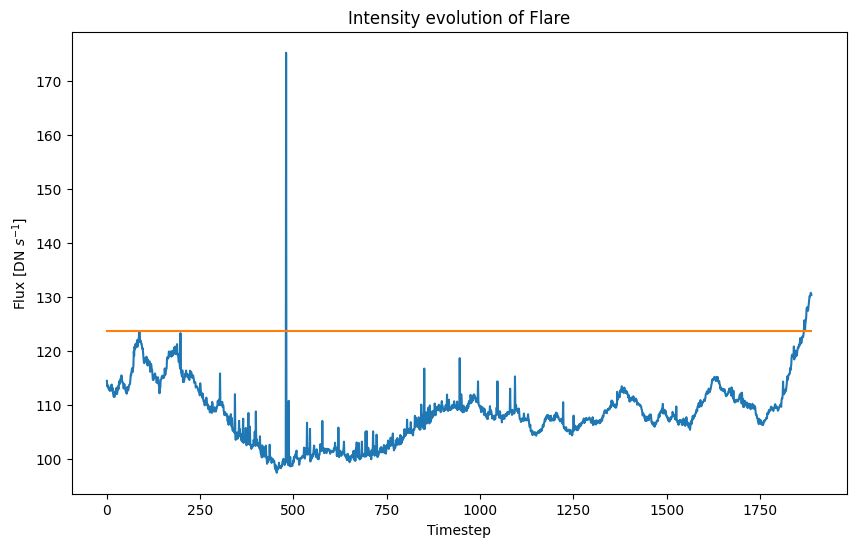

20221215_162437_3660259103 M1.1
37.71929625603589


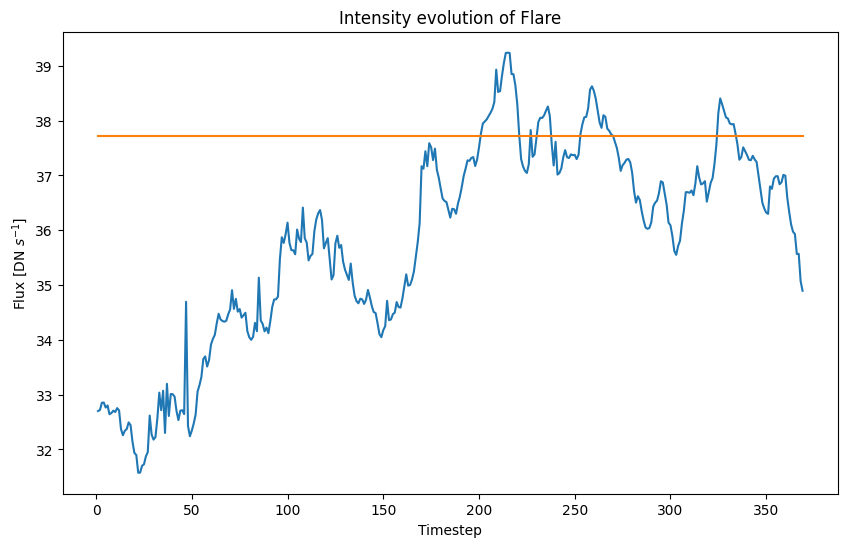

20230130_204858_3660259103 C2.1
39.08541617936706


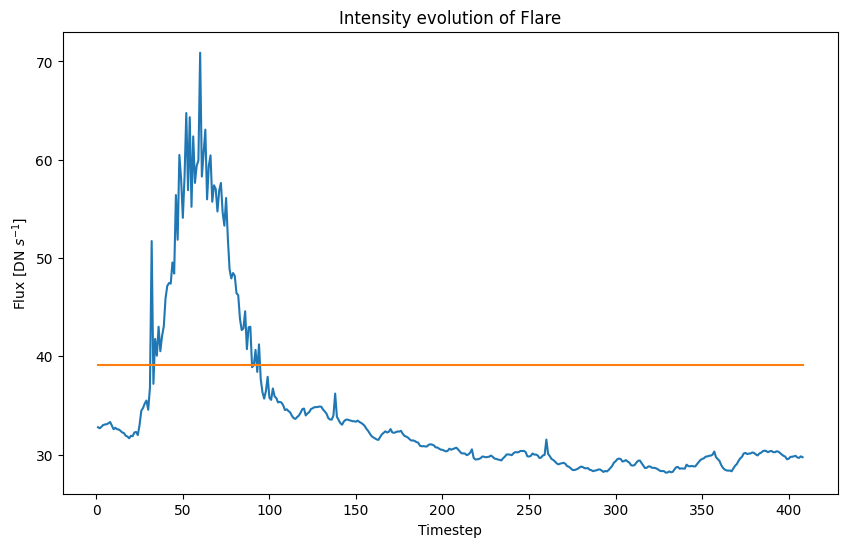

20230209_044127_3664103603 C6.0
137.8794062547926


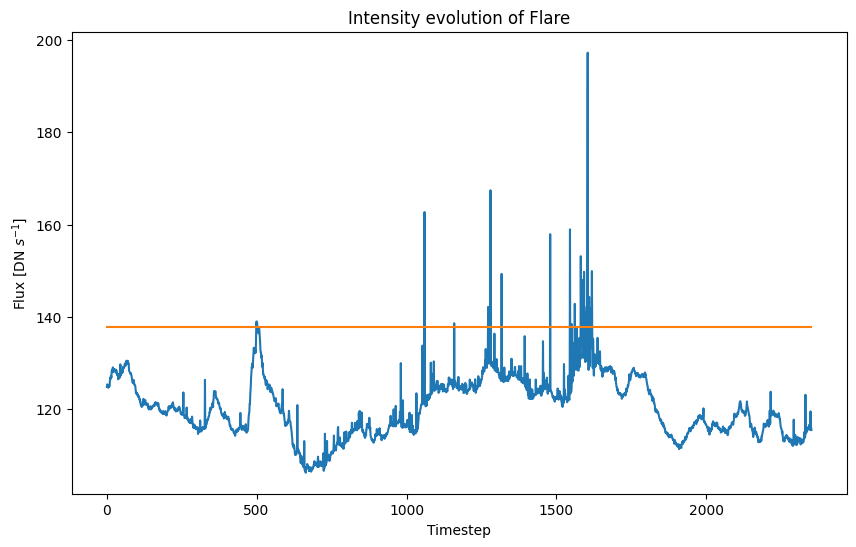

20230210_014633_3660259103 M3.7
39.42574888021376


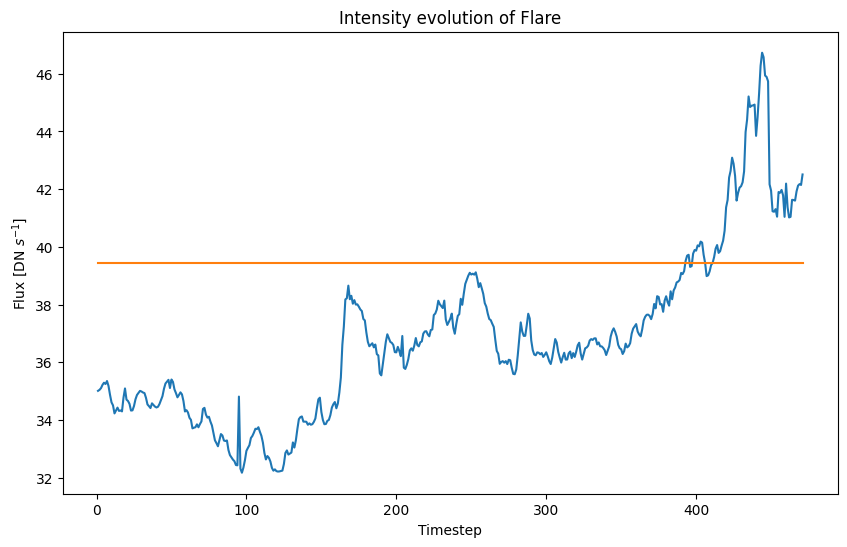

20230212_152220_3660259103 M1.0
43.95004917523315
20230222_084925_3660259103 N/A
inf
20230312_073936_3660259102 C1.6
inf
20230427_114232_3660259102 M1.8
32.03622705399446


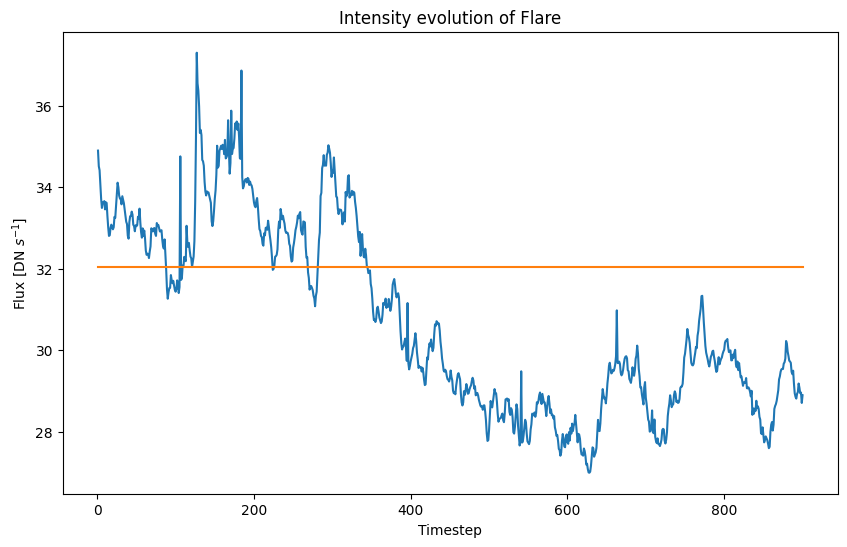

20230428_182835_3684105202 C4.2
132.61287522999132


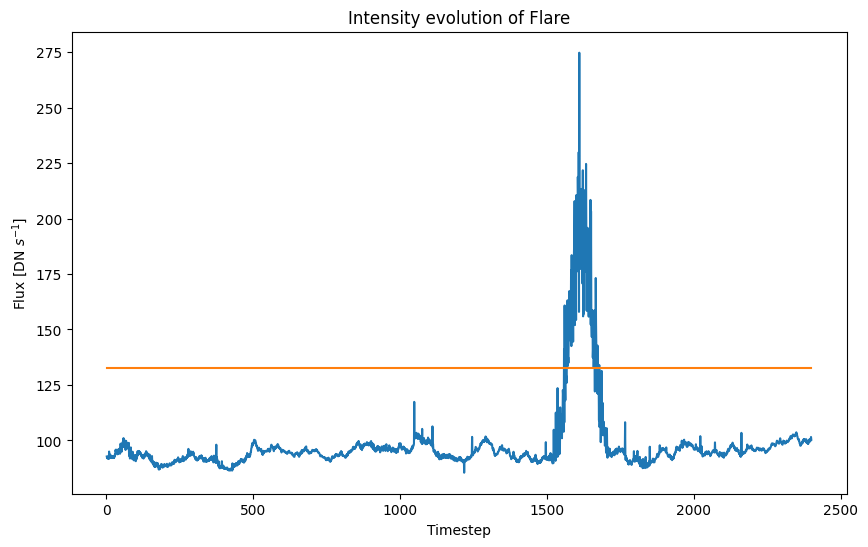

20230428_205338_3660107102 C7.2
176.70345749243182


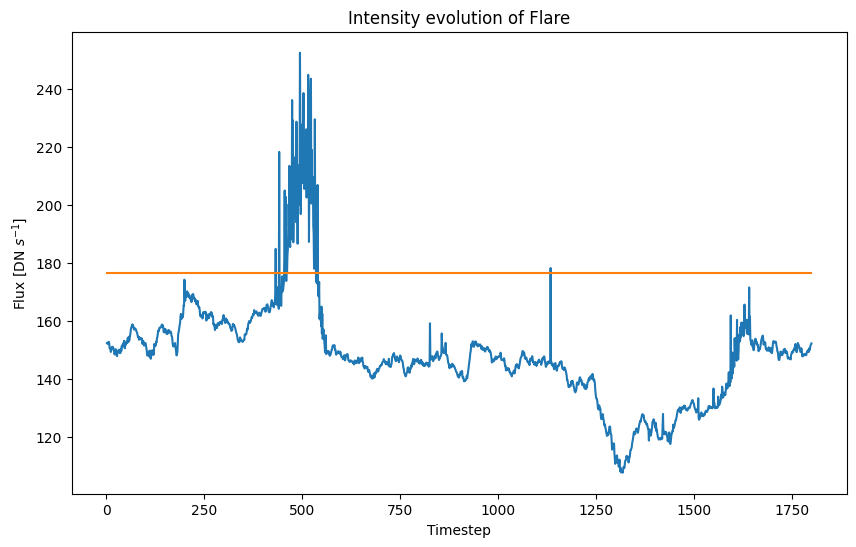

20230502_053648_3664103603 C5.1
inf
20230502_085125_3684109103 C1.3
139.03005651689313


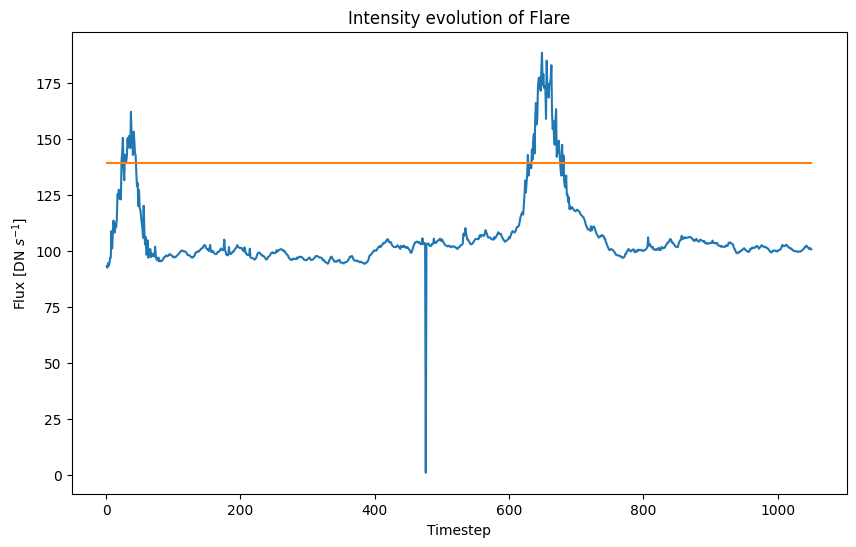

20230509_204428_3660107302 M5.0
148.85506021045674


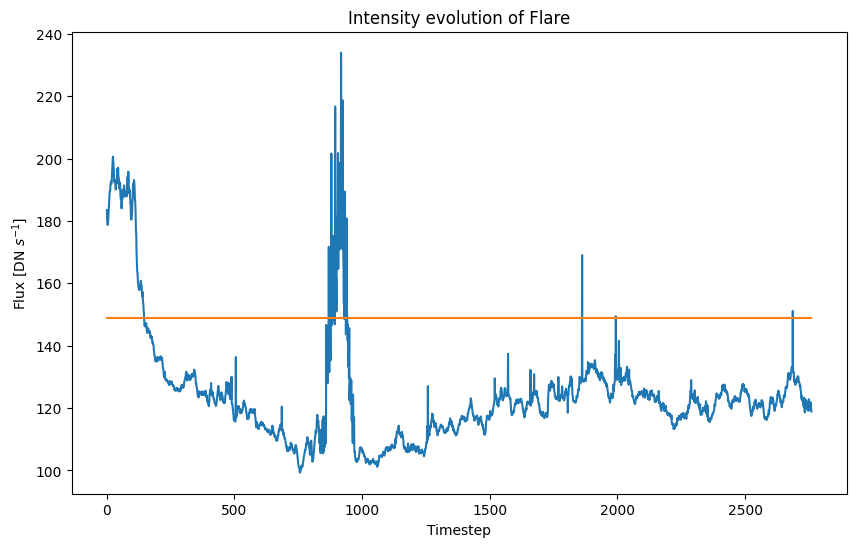

20230510_130930_3660107302 M2.2
174.66016637660115


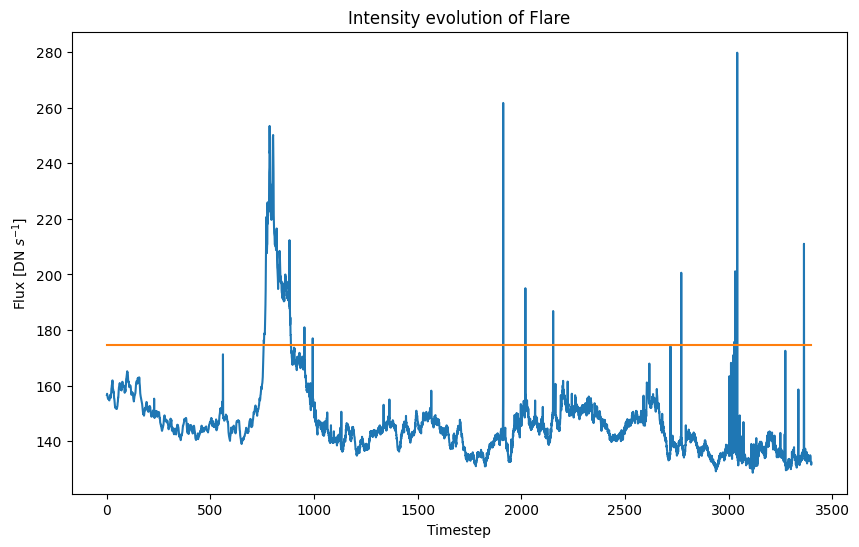

20230510_192428_3660107302 C4.4
152.56091820931277


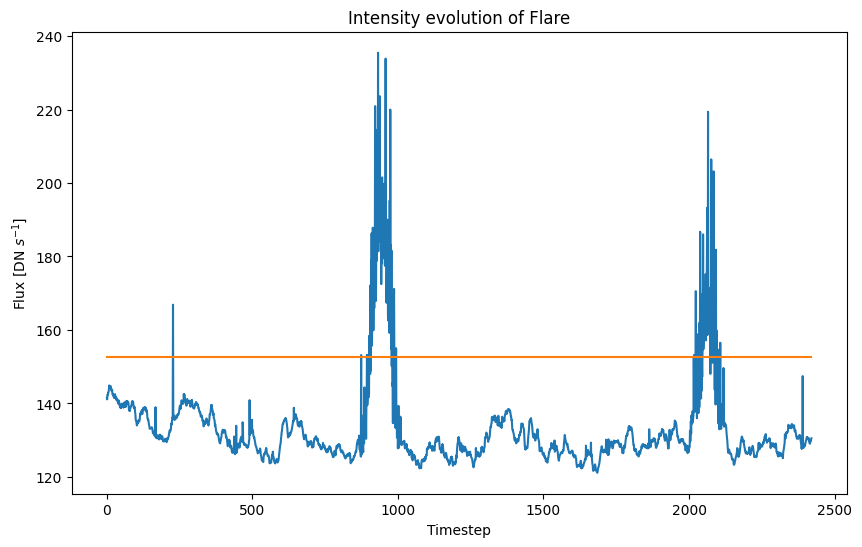

20230511_130937_3660105302 C6.2
inf
20230511_193935_3660105302 C3.8
nan
20230512_210935_3660105302 Larg
176.8367733991724


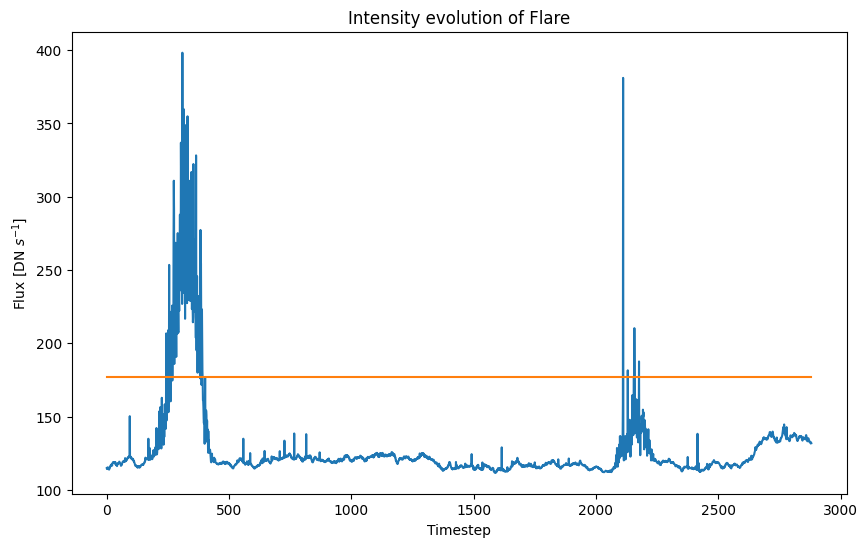

20230517_130436_3660259103 C2.8
38.097779034785034


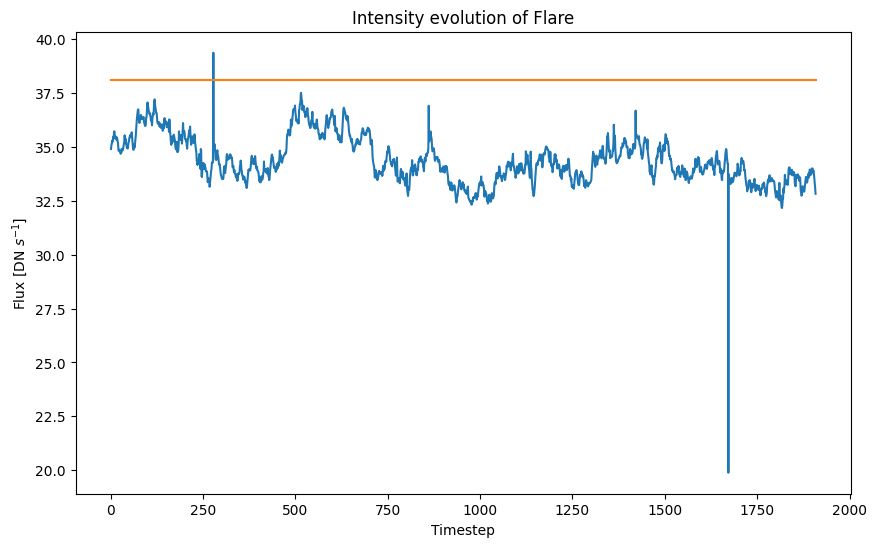

20230520_130936_3660259103 M5.7
inf
20230614_185424_4204700135 C6.7
91.87508191734018


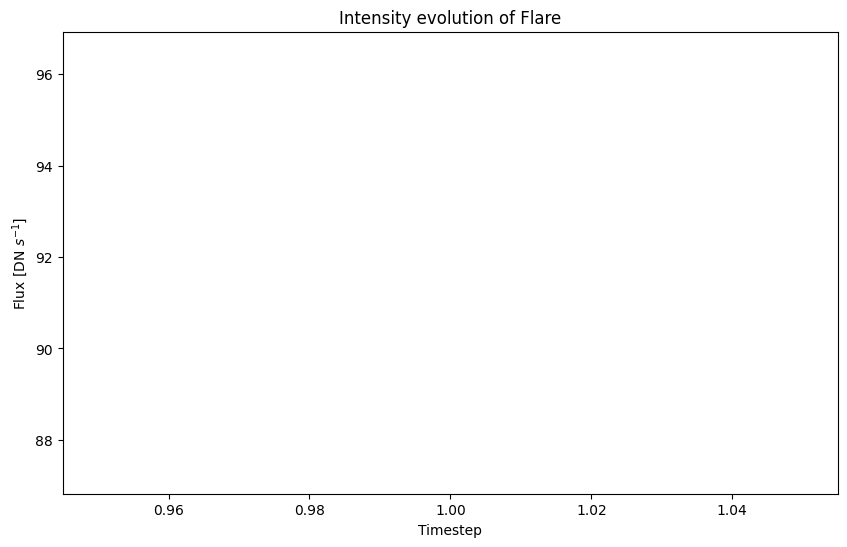

20230627_072928_3660259103 C1.9
44.06062930938348


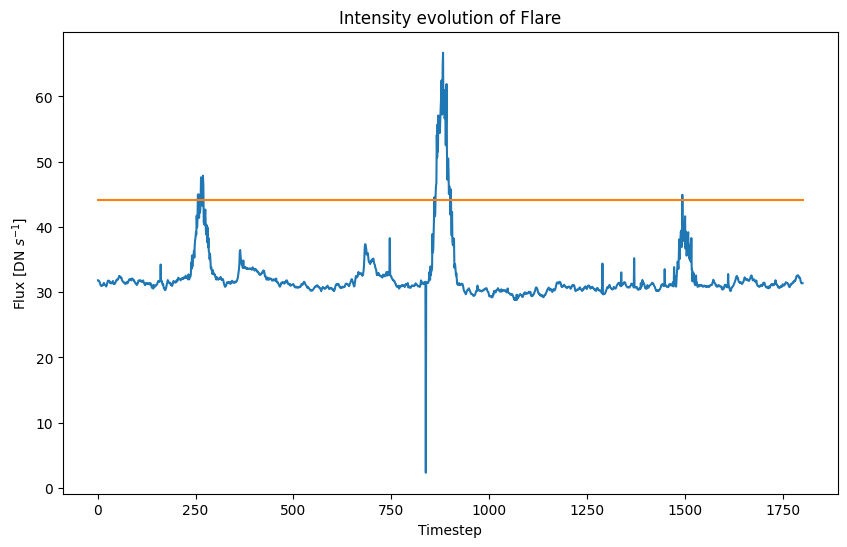

20230628_125436_3660259103 C2.4
35.74032590063786


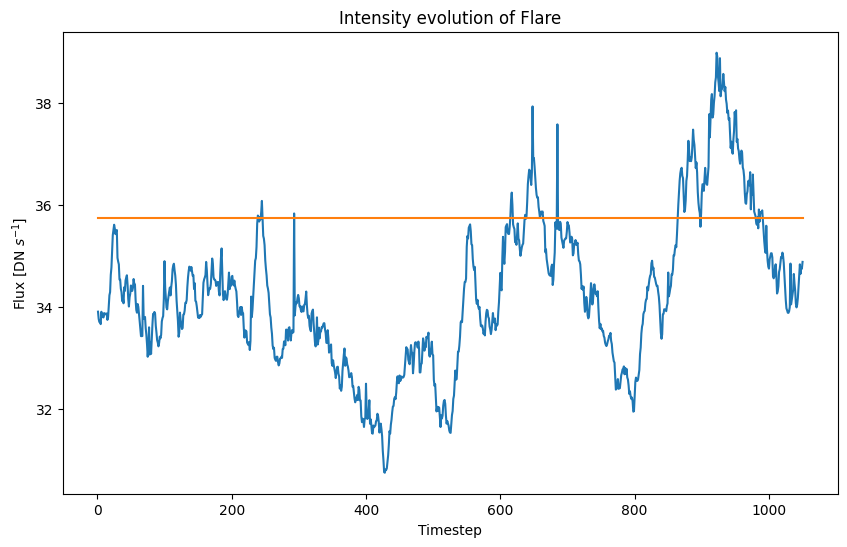

20230803_101422_4204700135 M2.0
67.37060646642071


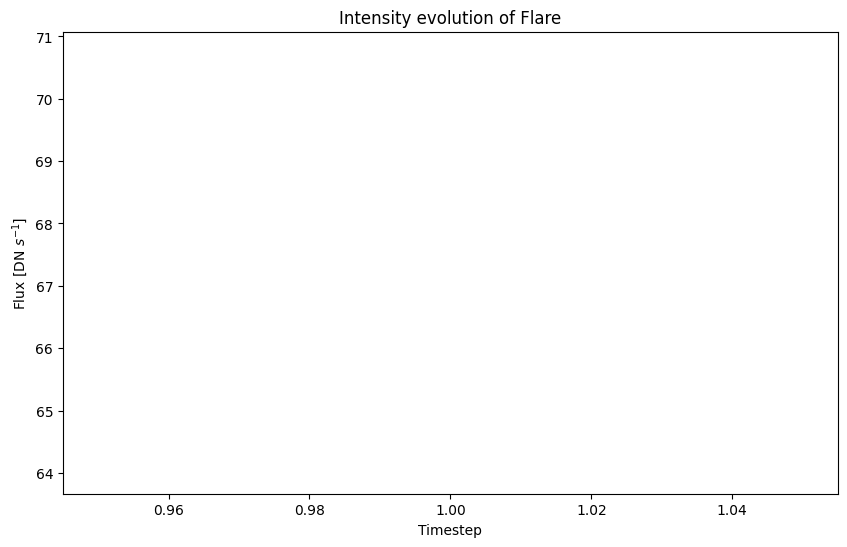

20230825_094210_4204700135 C1.2
27.032774177090126


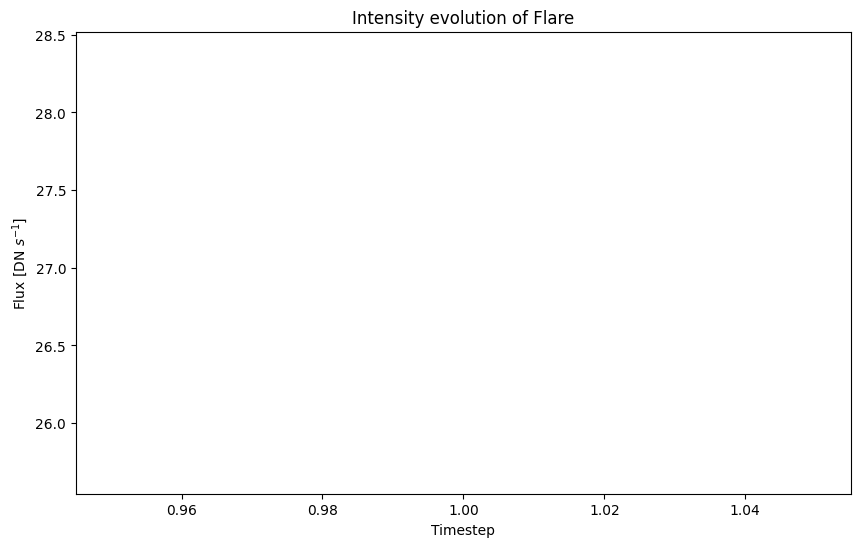

20230922_073124_3664105302 N/A
144.85460035660532


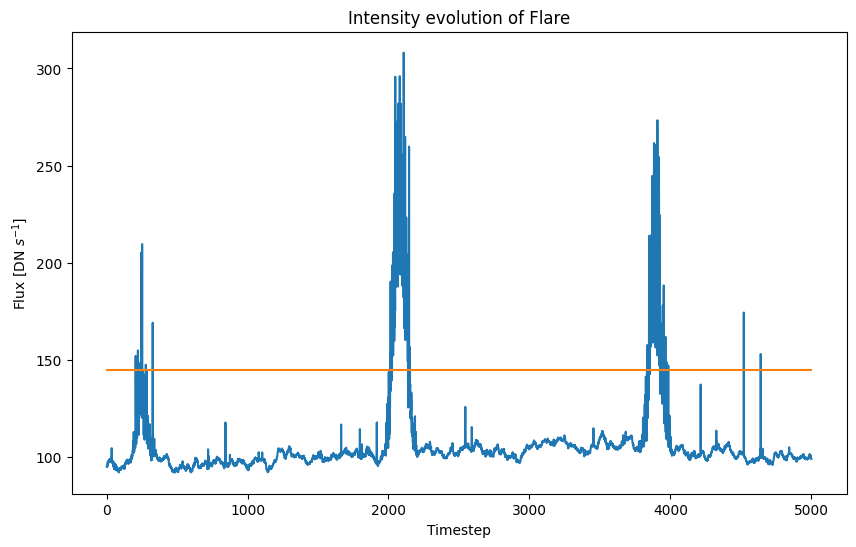

20230928_140814_3660259102 C2.6
inf
20231001_140834_3660259102 C2.0
inf
20231105_163401_4204700241 C4.4
22.335214213610595


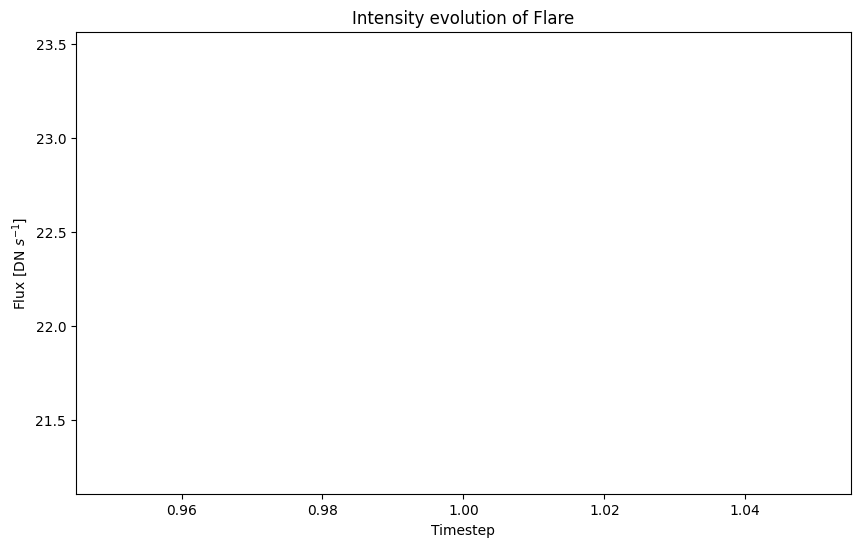

20231105_181120_4204700241 N/A
41.9327629092199


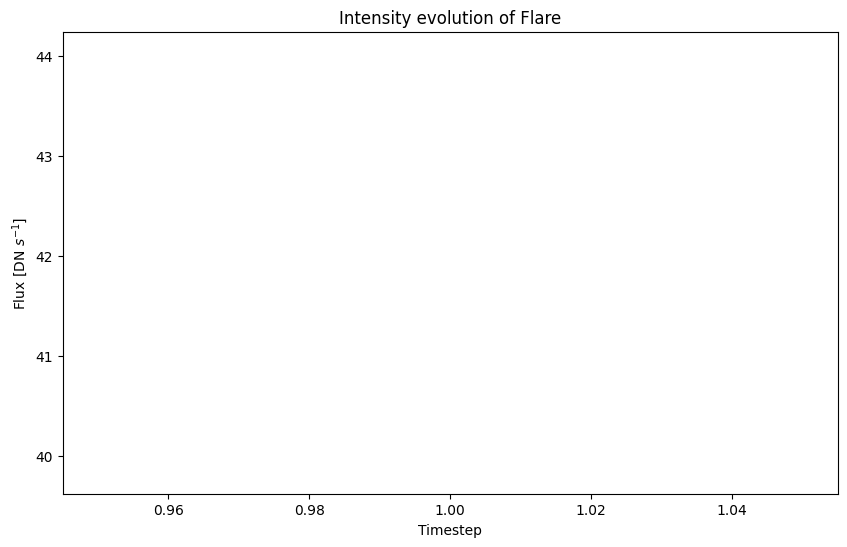

20231105_194839_4204700241 C2.6
48.288769231437925


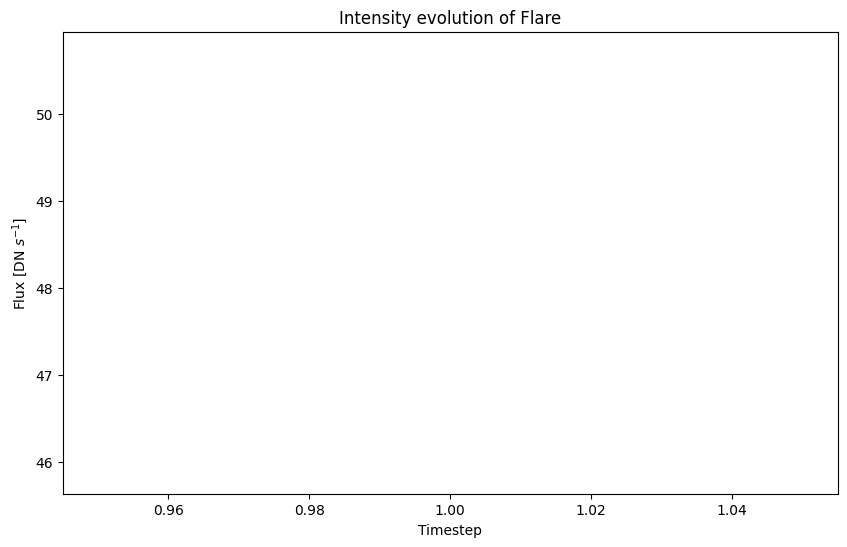

20231124_053221_4204700235 C3.3
nan
20240104_001410_3660259102 M1.1
35.68750927495029


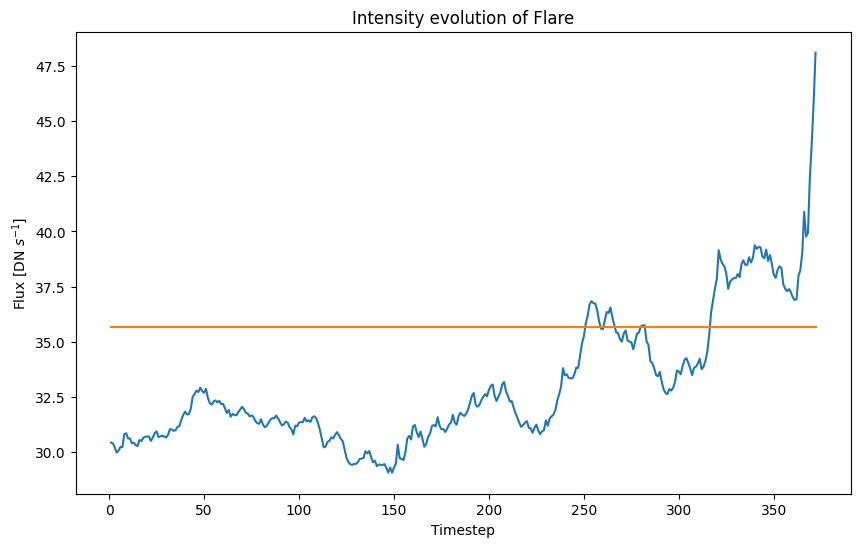

20240124_161739_4204700236 C7.6
82.511687700003


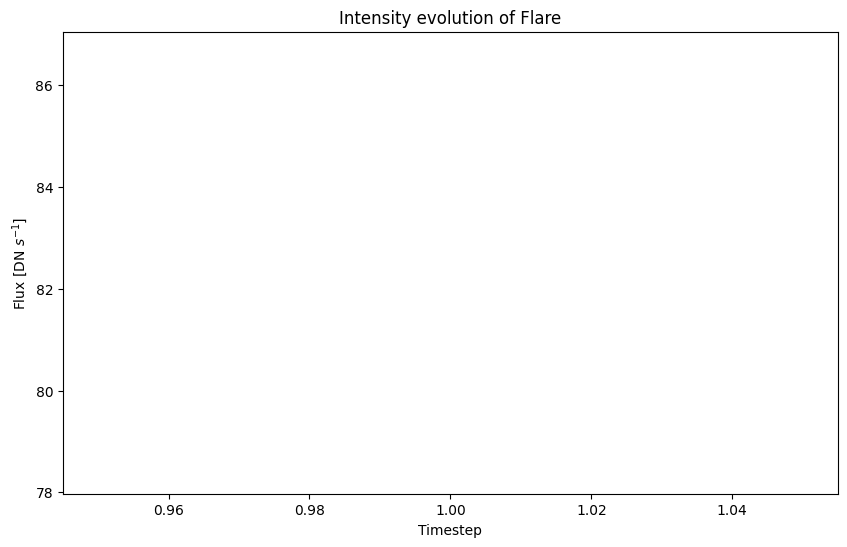

20240129_013915_4204700236 M1.3
77.2463445555108


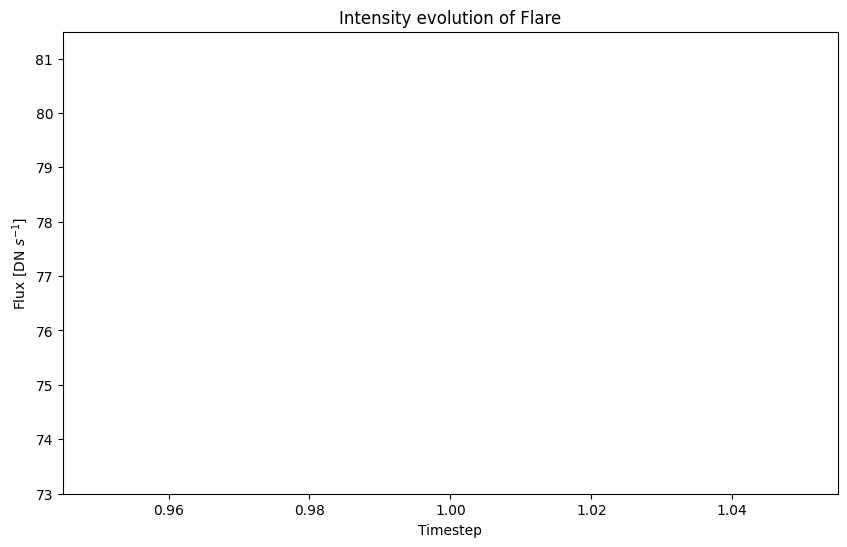

20240130_230227_4204700239 C1.6
89.17832285390608


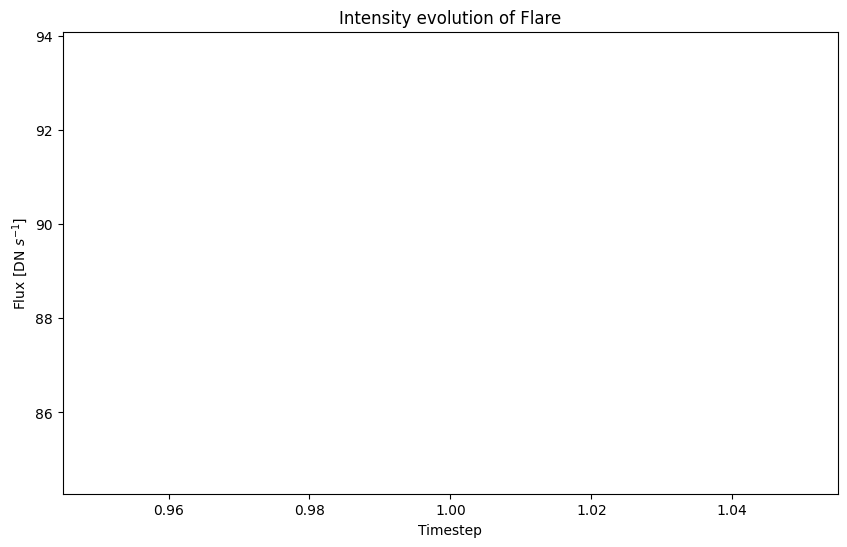

20240209_070002_4204700239 C3.8
106.63668175364695


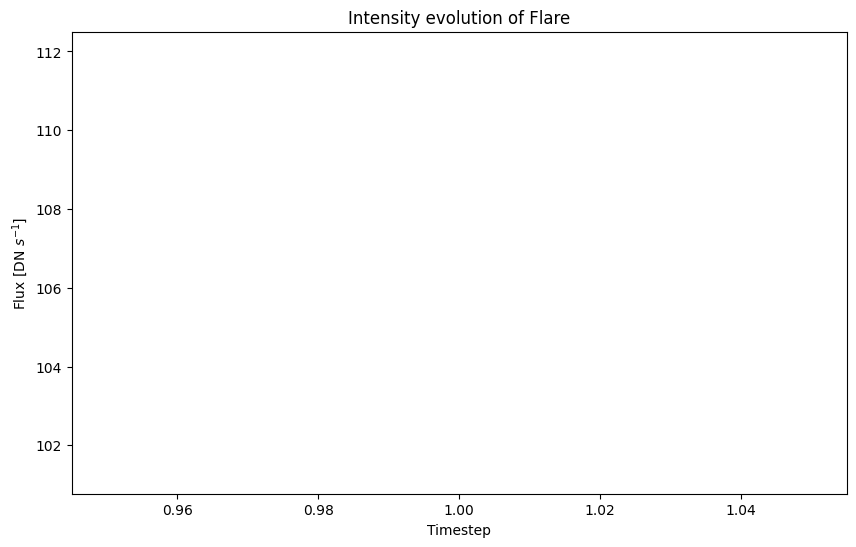

20240214_150451_3660259102 C7.5
60.93980171939991


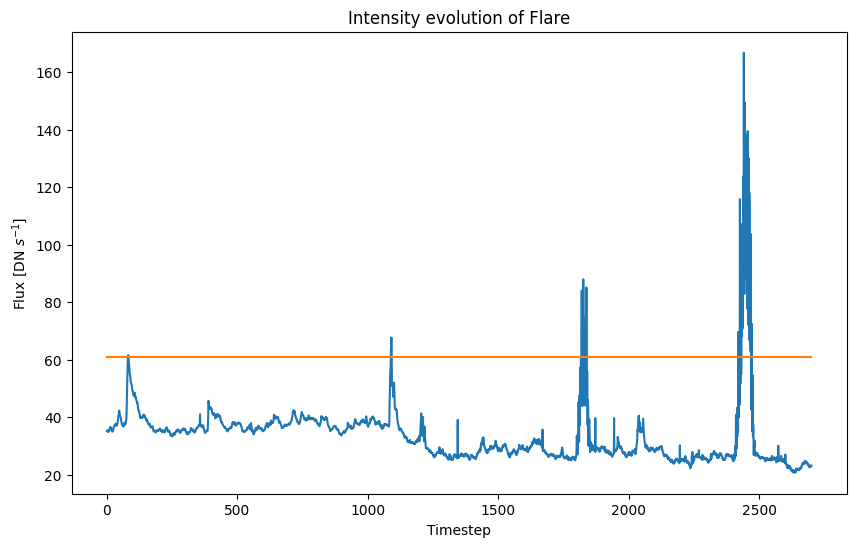

20240224_153246_3660259102 C5.8
42.98541657260417


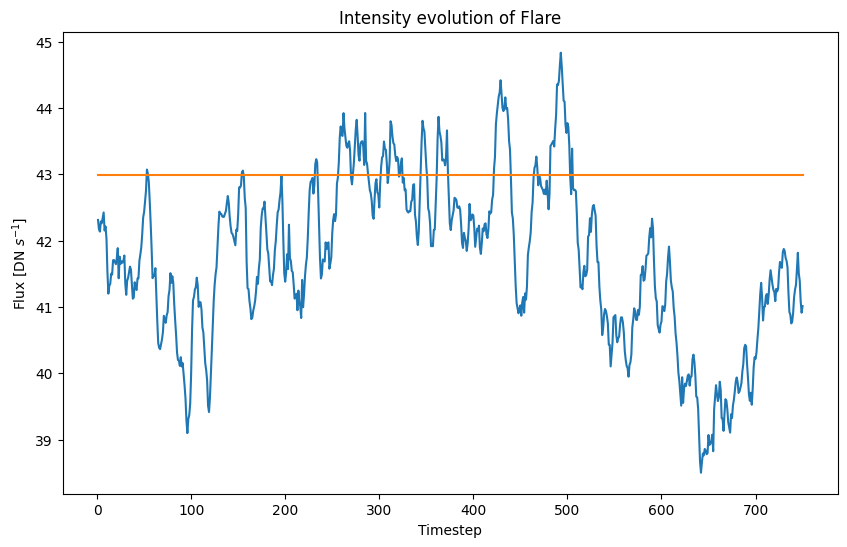

20240225_161003_3660259103 M2.0
40.28133529904593


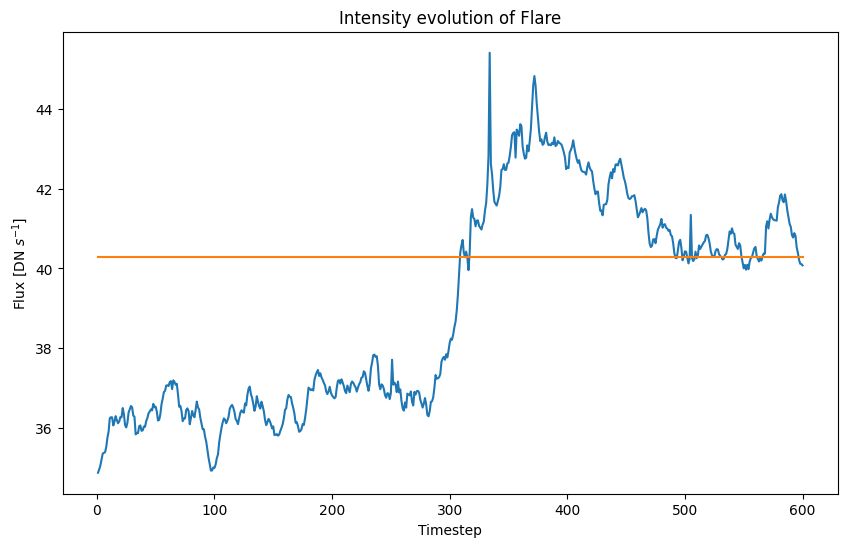

20240227_140253_4204700235 C1.9
66.98132204521661


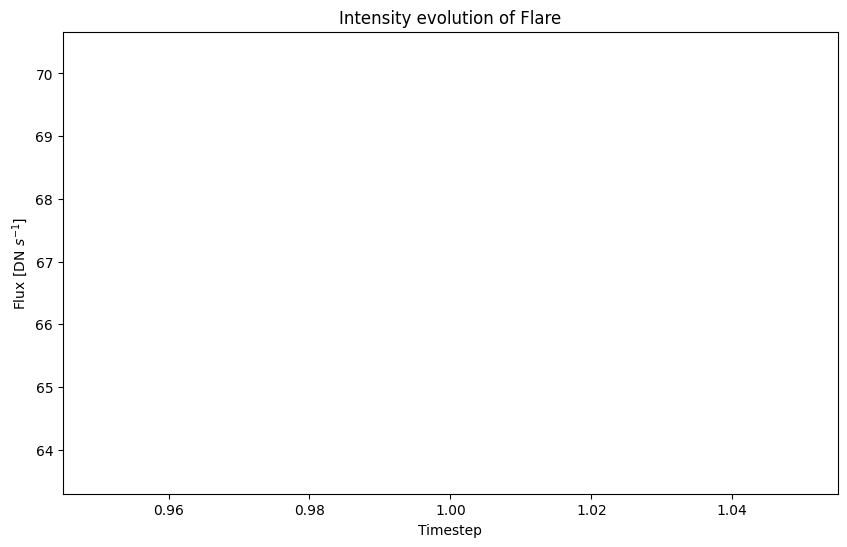

20240229_163923_4204700235 C2.6
75.86105060918071


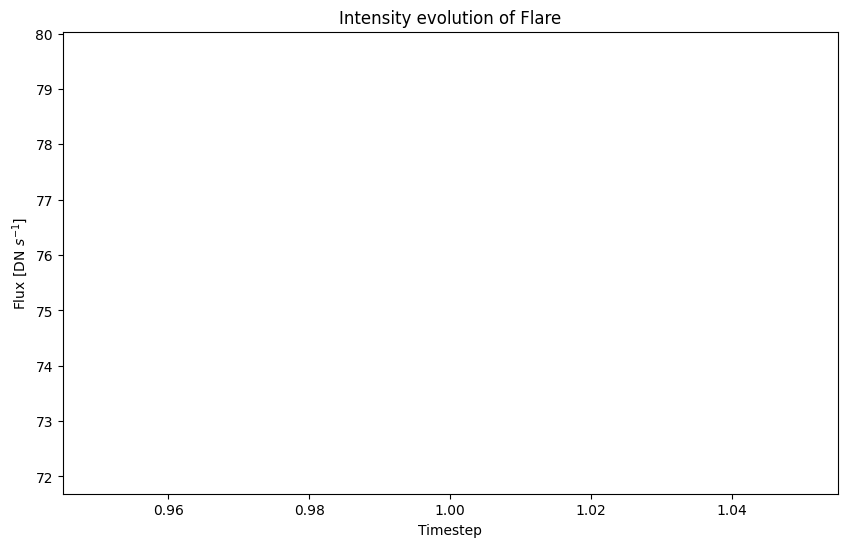

20240307_110937_3660259102 C6.3
43.16683443628686


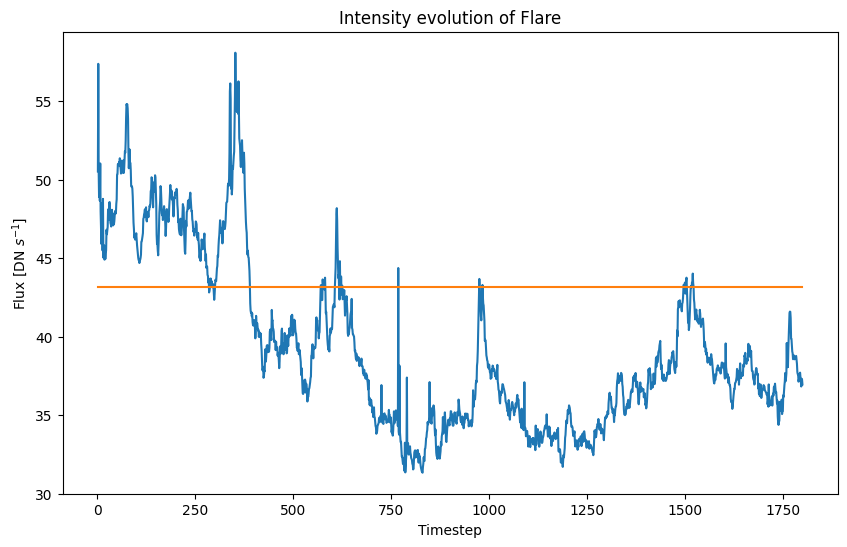

20240324_003923_4204700235 M2.1
140.34307582780824


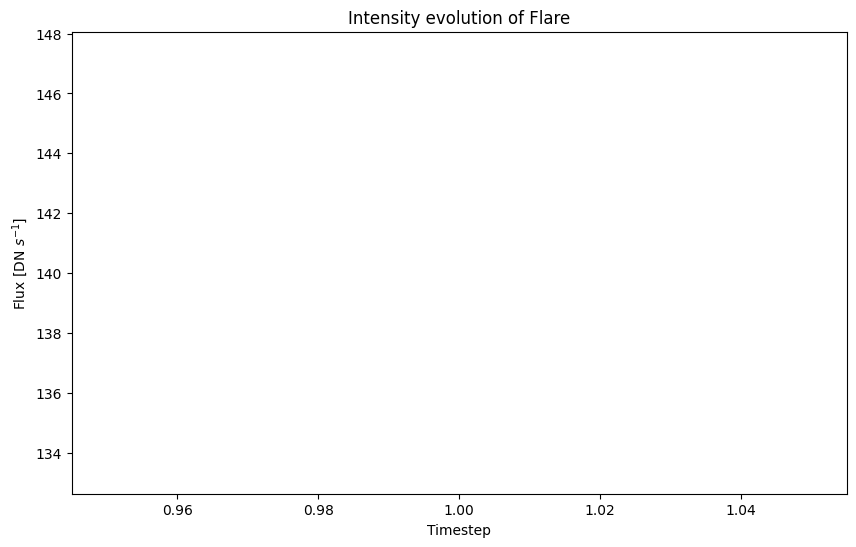

In [39]:
import matplotlib.pyplot as plt


def Find_Start(obs, Number): #Observation and number of important y-positions
    #Selects the y and time steps that pass a certain threshold depending on the median
    hdrs = obs.raster("Mg II k").headers
    lambda_min = hdrs[0]["WAVEMIN"] + 0.00001
    lambda_max = hdrs[0]["WAVEMAX"] - 0.00001
    exptime = obs.raster("Mg II k").get_exptimes()
    """ if lambda_min < 2791.2:
        lambda_min = 2791.2
    if lambda_max > 2792:
        lambda_max = 2792
    if lambda_min > lambda_max: 
        print("Minimale Wellenlänge grösser als Maximale")"""
    # n_breaks = 100
    if obs.raster.has_line("Mg II k"):
        exptime = obs.raster("Mg II k").get_exptimes()
        a = obs.raster("Mg II k")
        mean = []
        Mean = []
        absmax = []
        times = []
        Maximum = []
        for t in range(a.shape[0]):
            interpolated_image = a.get_interpolated_image_step( t, lambda_min, lambda_max, n_breaks=100 )
            for y in range(interpolated_image.shape[0]):
                # Extract the slice corresponding to the current 't' and 'y'
                b = interpolated_image[y]/exptime[t]
                # Find the maximum value in the slice, keep present
                absmax.append(np.max(b))
            mean.append(np.mean(absmax))
            absmax = []
        Max = []
        threshold = np.median(mean) + 0.2*(np.max(mean)- np.min(mean))
        #threshold = np.mean(mean)
        print(threshold)
        c = False
        for i in range(len(mean)):
            if mean[i] >= threshold:
                c = True
        if c == True:
            plt.plot(np.linspace(1, a.shape[0], a.shape[0]), mean)
            plt.plot([1, a.shape[0]], [threshold, threshold])
            plt.title('Intensity evolution of Flare')
            plt.ylabel(r'Flux [DN $s^{-1}$]')
            plt.xlabel('Timestep')
            plt.show()

n_obs = len(UsableData)

for n in range(n_obs):
    path0 = "/sml/iris/" + str(UsableData[n][0:4] + "/" + str(UsableData[n][4:6]) + "/" + str(UsableData[n][6:8]))
    os.chdir( path0)
    obs = observation(UsableData[n],keep_null=True)
    print(UsableData[n], mag3[n])
    Find_Start(obs,10)


In [ ]:

#ras_pos_time = raster.get_timestamps(0)

